# **I. Title**

**Project :**

Memprediksi customer behavior yang dimiliki oleh HOME CREDIT INDONESIA apakah sulit membayar atau tidak menggunakan machine learning (supervised learning) dengan algoritma CatBoost, Random Forest, dan XGBoost



**Objective :**

Project ini dilakukan untuk memenuhi salah satu syarat kelulusan yaitu menggunakan data dari HOME CREDIT INDONESIA untuk melakukan binary prediction pada customer behavior

# **II. Introduction**

Nama : Muhammad Farhan Darmawan

Batch : RMT 019

# **III. Eksternal Link**

**Deployment :**

https://huggingface.co/spaces/farhandraka/Home-Credit-Indonesia-Prediction/upload/main

# **IV. Working Area**

## **A. Import Libraries**

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer #Outlier / Missing Value
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer # Caping Missing Value
from sklearn.compose import ColumnTransformer

# Correlation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from scipy.stats import chi2_contingency

# Model
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# XGBoost
from xgboost import XGBClassifier
# CatBoost
from catboost import CatBoostClassifier
# GridsearchCV & Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Evaluasi
# Classification
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, f1_score, roc_curve, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score 

#Balancing
from imblearn.over_sampling import SMOTENC
# dataprep
from dataprep.eda import plot, plot_missing, plot_correlation, create_report
# Save Model
import joblib
import pickle
import json

import warnings
warnings.filterwarnings("ignore")

## **B. Data Loading**

### Application Training

In [2]:
# define dataframe
app_train = pd.read_csv('application_train.csv')
pd.set_option('display.max_columns', None)

In [3]:
# Show 5 upper data
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
# Show 5 lower data
app_train.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

In [5]:
# Show information of data
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# Show shape of data
app_train.shape

(307511, 122)

In [7]:
# Cek duplicated data
app_train.duplicated(keep = False).sum()

0

### Bureau Balance

In [8]:
# define dataframe
bureau_balance = pd.read_csv('bureau_balance.csv')
pd.set_option('display.max_columns', None)

In [9]:
# Show 5 upper data
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [10]:
# Show 5 lower data
bureau_balance.tail()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
27299920       5041336             -47      X
27299921       5041336             -48      X
27299922       5041336             -49      X
27299923       5041336             -50      X
27299924       5041336             -51      X

In [11]:
# Show information of data
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [12]:
# Show shape of data
bureau_balance.shape

(27299925, 3)

In [13]:
# Cek duplicated data
bureau_balance.duplicated(keep = False).sum()

0

### Bureau

In [14]:
# define dataframe
bureau = pd.read_csv('bureau.csv')
pd.set_option('display.max_columns', None)

In [15]:
# Show 5 upper data
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [16]:
# Show 5 lower data
bureau.tail()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
1716423      259355       5057750        Active      currency 1          -44   
1716424      100044       5057754        Closed      currency 1        -2648   
1716425      100044       5057762        Closed      currency 1        -1809   
1716426      246829       5057770        Closed      currency 1        -1878   
1716427      246829       5057778        Closed      currency 1         -463   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
1716423                   0                -30.0                NaN   
1716424                   0              -2433.0            -2493.0   
1716425                   0              -1628.0             -970.0   
1716426                   0              -1513.0            -1513.0   
1716427                   0                  NaN             -387.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
1716423                     0.0                   0        11250.00   
1716424                  5476.5                   0        38130.84   
1716425                     NaN                   0        15570.00   
1716426                     NaN                   0        36000.00   
1716427                     NaN                   0        22500.00   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
1716423              11250.0                   0.0                     0.0   
1716424                  0.0                   0.0                     0.0   
1716425                  NaN                   NaN                     0.0   
1716426                  0.0                   0.0                     0.0   
1716427                  0.0                   NaN                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
1716423        Microloan                 -19          NaN  
1716424  Consumer credit               -2493          NaN  
1716425  Consumer credit                -967          NaN  
1716426  Consumer credit               -1508          NaN  
1716427        Microloan                -387          NaN

In [17]:
# Show information of data
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [18]:
# Show shape of data
bureau.shape

(1716428, 17)

In [19]:
# Cek duplicated data
bureau.duplicated(keep = False).sum()

0

### Credit Card Balance

In [20]:
# define dataframe
credit_card_balance = pd.read_csv('credit_card_balance.csv')
pd.set_option('display.max_columns', None)

In [21]:
# Show 5 upper data
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [22]:
# Show 5 lower data
credit_card_balance.tail()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
3840307     1036507      328243              -9        0.000   
3840308     1714892      347207              -9        0.000   
3840309     1302323      215757              -9   275784.975   
3840310     1624872      430337             -10        0.000   
3840311     2411345      236760             -10        0.000   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
3840307                    45000                       NaN   
3840308                    45000                       0.0   
3840309                   585000                  270000.0   
3840310                   450000                       NaN   
3840311                   157500                       0.0   

         AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
3840307                   0.0                         NaN   
3840308                   0.0                         0.0   
3840309              270000.0                         0.0   
3840310                   0.0                         NaN   
3840311                   0.0                         0.0   

         AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  \
3840307                       NaN                      0.0   
3840308                       0.0                      0.0   
3840309                       0.0                   2250.0   
3840310                       NaN                      0.0   
3840311                       0.0                      0.0   

         AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
3840307                  NaN                      0.000   
3840308              1879.11                      0.000   
3840309            375750.00                 356994.675   
3840310                  NaN                      0.000   
3840311                 0.00                      0.000   

         AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
3840307                      0.00          0.000                 0.000   
3840308                      0.00          0.000                 0.000   
3840309                 269356.14     273093.975            273093.975   
3840310                      0.00          0.000                 0.000   
3840311                      0.00          0.000                 0.000   

         CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
3840307                       NaN                     0   
3840308                       0.0                     0   
3840309                       2.0                     2   
3840310                       NaN                     0   
3840311                       0.0                     0   

         CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
3840307                         NaN                       NaN   
3840308                         0.0                       0.0   
3840309                         0.0                       0.0   
3840310                         NaN                       NaN   
3840311                         0.0                       0.0   

         CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
3840307                        0.0               Active       0           0  
3840308                       23.0               Active       0           0  
3840309                       18.0               Active       0           0  
3840310                        0.0               Active       0           0  
3840311                       21.0            Completed       0           0

In [23]:
# Show information of data
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [24]:
# Show shape of data
credit_card_balance.shape

(3840312, 23)

In [25]:
# Cek duplicated data
credit_card_balance.duplicated(keep = False).sum()

0

### Installments Payment

In [26]:
# define dataframe
installment_payment = pd.read_csv('installments_payments.csv')
pd.set_option('display.max_columns', None)

In [27]:
# Show 5 upper data
installment_payment.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [28]:
# Show 5 lower data
installment_payment.tail()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
13605396     2186857      428057                     0.0   
13605397     1310347      414406                     0.0   
13605398     1308766      402199                     0.0   
13605399     1062206      409297                     0.0   
13605400     2448869      434321                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
13605396                     66          -1624.0                 NaN   
13605397                     47          -1539.0                 NaN   
13605398                     43             -7.0                 NaN   
13605399                     43          -1986.0                 NaN   
13605400                     19            -27.0                 NaN   

          AMT_INSTALMENT  AMT_PAYMENT  
13605396          67.500          NaN  
13605397          67.500          NaN  
13605398       43737.435          NaN  
13605399          67.500          NaN  
13605400       11504.250          NaN

In [29]:
# Show information of data
installment_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [30]:
# Show shape of data
installment_payment.shape

(13605401, 8)

In [31]:
# Cek duplicated data
installment_payment.duplicated(keep = False).sum()

0

### POS CASH Balance

In [32]:
# define dataframe
pos_cash_balance = pd.read_csv('POS_CASH_balance.csv')
pd.set_option('display.max_columns', None)

In [33]:
# Show 5 upper data
pos_cash_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [34]:
# Show 5 lower data
pos_cash_balance.tail()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
10001353     2448283      226558             -20             6.0   
10001354     1717234      141565             -19            12.0   
10001355     1283126      315695             -21            10.0   
10001356     1082516      450255             -22            12.0   
10001357     1259607      174278             -52            16.0   

          CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
10001353                    0.0               Active     843           0  
10001354                    0.0               Active     602           0  
10001355                    0.0               Active     609           0  
10001356                    0.0               Active     614           0  
10001357                    0.0            Completed       0           0

In [35]:
# Show information of data
pos_cash_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [36]:
# Show shape of data
pos_cash_balance.shape

(10001358, 8)

In [37]:
# Cek duplicated data
pos_cash_balance.duplicated(keep = False).sum()

0

### Previous Application

In [38]:
# define dataframe
previous_application = pd.read_csv('previous_application.csv')
pd.set_option('display.max_columns', None)

In [39]:
# Show 5 upper data
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [40]:
# Show 5 lower data
previous_application.tail()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1670209           0.000000                    NaN                       NaN   
1670210           0.340554                    NaN                       NaN   
1670211           0.101401                    NaN                       NaN   
1670212                NaN                    NaN                       NaN   
1670213                NaN                    NaN                       NaN   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
1670209                    XAP             Approved           -544   
1670210                    XAP             Approved          -1694   
1670211                    XAP             Approved          -1488   
1670212                    XNA             Approved          -1185   
1670213                    XNA             Approved          -1193   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
1670209  Cash through the bank                XAP              NaN   
1670210  Cash through the bank                XAP    Unaccompanied   
1670211  Cash through the bank                XAP  Spouse, partner   
1670212  Cash through the bank                XAP           Family   
1670213  Cash through the bank                XAP           Family   

        NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
1670209        Refreshed             Furniture            POS   
1670210              New             Furniture            POS   
1670211         Repeater  Consumer Electronics            POS   
1670212         Repeater                   XNA           Cash   
1670213         Repeater                   XNA           Cash   

        NAME_PRODUCT_TYPE     CHANNEL_TYPE  SELLERPLACE_AREA  \
1670209               XNA            Stone                43   
1670210               XNA            Stone                43   
1670211               XNA     Country-wide              1370   
1670212            x-sell  AP+ (Cash loan)                -1   
1670213            x-sell  AP+ (Cash loan)                -1   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
1670209             Furniture         30.0       low_normal   
1670210             Furniture         12.0           middle   
1670211  Consumer electronics         10.0       low_normal   
1670212                   XNA         12.0       low

In [41]:
# Show information of data
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [42]:
# Show shape of data
previous_application.shape

(1670214, 37)

In [43]:
# Cek duplicated data
previous_application.duplicated(keep = False).sum()

0

### Sample Submission

In [44]:
# define dataframe
sample_submission = pd.read_csv('sample_submission.csv')
pd.set_option('display.max_columns', None)

In [45]:
# Show 5 upper data
sample_submission.head()

SK_ID_CURR  TARGET
0      100001     0.5
1      100005     0.5
2      100013     0.5
3      100028     0.5
4      100038     0.5

In [46]:
# Show 5 lower data
sample_submission.tail()

SK_ID_CURR  TARGET
48739      456221     0.5
48740      456222     0.5
48741      456223     0.5
48742      456224     0.5
48743      456250     0.5

In [47]:
# Show information of data
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  48744 non-null  int64  
 1   TARGET      48744 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 761.8 KB


In [48]:
# Show shape of data
sample_submission.shape

(48744, 2)

In [49]:
# Cek duplicated data
sample_submission.duplicated(keep = False).sum()

0

## **C. Exploratory Data Analysis**

Pada exploratory data analysis saya hanya menggunakan dataset application training  untuk dilakukan explorasi data

### Data Cleaning

In [50]:
# define age columns
app_train['AGE'] = app_train['DAYS_BIRTH'] / -365
app_train['AGE'] = app_train['AGE'].apply(round)

In [51]:
# grouping age of customer
age_cat = []
for i in app_train['AGE']:
    if i < 36:
        age_cat.append('Young Adult')
    elif i < 51:
        age_cat.append('Adult')
    else:
        age_cat.append('Older')

app_train['AGE_CATEGORY'] = age_cat

In [52]:
# define year employed
app_train['YEAR_EMPLOYED'] = app_train['DAYS_EMPLOYED'] / -365
app_train['YEAR_EMPLOYED'] = app_train['YEAR_EMPLOYED'].apply(round)

In [53]:
# define year registration
app_train['YEAR_REGISTRATION'] = app_train['DAYS_REGISTRATION'] / -365
app_train['YEAR_REGISTRATION'] = app_train['YEAR_REGISTRATION'].apply(round)

In [54]:
# define year id publish
app_train['YEAR_ID_PUBLISH'] = app_train['DAYS_ID_PUBLISH'] / -365
app_train['YEAR_ID_PUBLISH'] = app_train['YEAR_ID_PUBLISH'].apply(round)

In [55]:
# fillna the null value
median_last_phone_change = app_train['DAYS_LAST_PHONE_CHANGE'].median()
app_train['DAYS_LAST_PHONE_CHANGE'].fillna(median_last_phone_change, inplace=True)

In [56]:
# define year last phone change
app_train['YEAR_LAST_PHONE_CHANGE'] = app_train['DAYS_LAST_PHONE_CHANGE'] / -365
app_train['YEAR_LAST_PHONE_CHANGE'] = app_train['YEAR_LAST_PHONE_CHANGE'].apply(round)

### Check Histogram Graph of Numerical

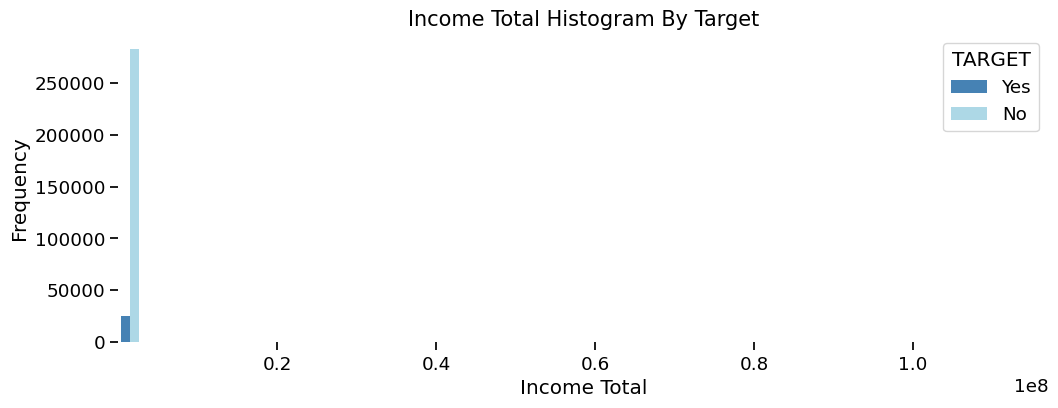

In [57]:
# Menampilkan grafik AMT_INCOME_TOTAL
x1 = list(app_train[app_train['TARGET'] == 1]['AMT_INCOME_TOTAL'])
x2 = list(app_train[app_train['TARGET'] == 0]['AMT_INCOME_TOTAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([app_train['AMT_INCOME_TOTAL'].min(),app_train['AMT_INCOME_TOTAL'].max()])
plt.legend(['Yes', 'No'], title = 'TARGET', loc='upper right', facecolor='white')
plt.xlabel('Income Total')
plt.ylabel('Frequency')
plt.title('Income Total Histogram By Target', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

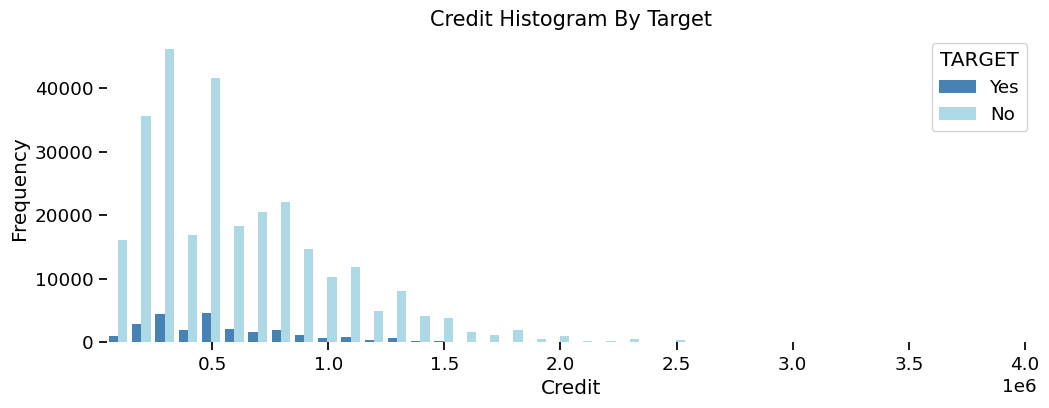

In [58]:
# Menampilkan grafik AMT_CREDIT
x1 = list(app_train[app_train['TARGET'] == 1]['AMT_CREDIT'])
x2 = list(app_train[app_train['TARGET'] == 0]['AMT_CREDIT'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([app_train['AMT_CREDIT'].min(),app_train['AMT_CREDIT'].max()])
plt.legend(['Yes', 'No'], title = 'TARGET', loc='upper right', facecolor='white')
plt.xlabel('Credit')
plt.ylabel('Frequency')
plt.title('Credit Histogram By Target', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

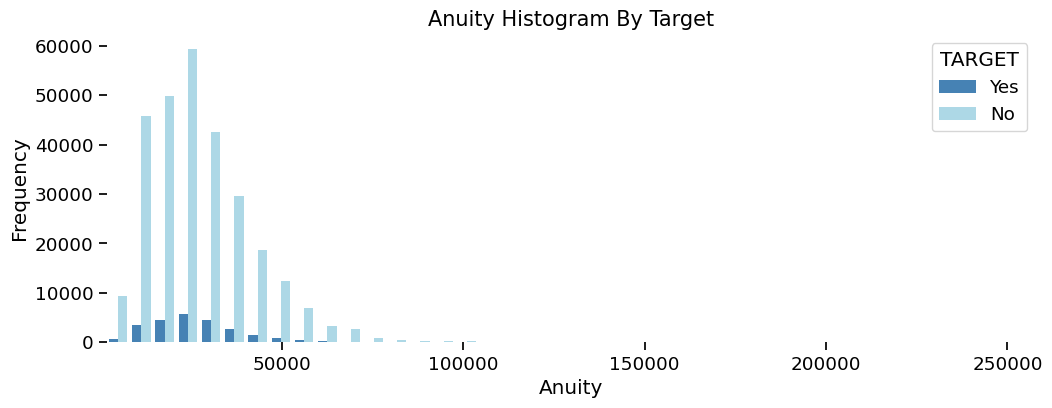

In [59]:
# Menampilkan grafik AMT_ANNUITY
x1 = list(app_train[app_train['TARGET'] == 1]['AMT_ANNUITY'])
x2 = list(app_train[app_train['TARGET'] == 0]['AMT_ANNUITY'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([app_train['AMT_ANNUITY'].min(),app_train['AMT_ANNUITY'].max()])
plt.legend(['Yes', 'No'], title = 'TARGET', loc='upper right', facecolor='white')
plt.xlabel('Anuity')
plt.ylabel('Frequency')
plt.title('Anuity Histogram By Target', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

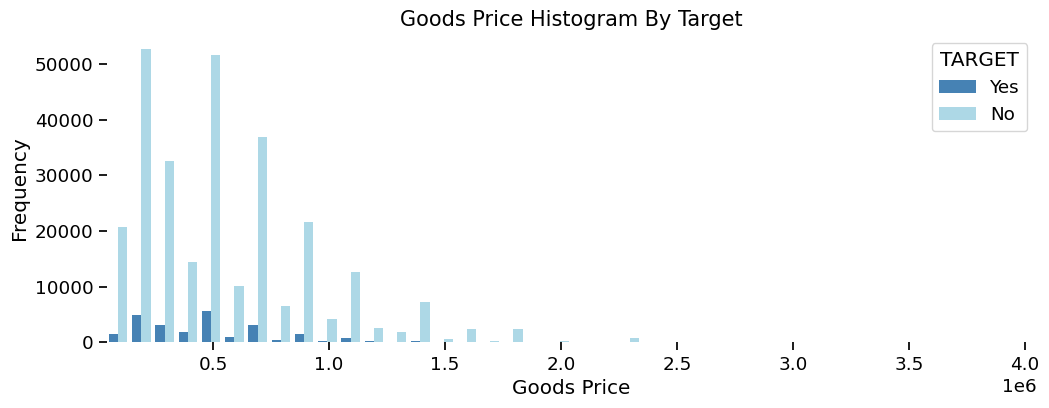

In [60]:
# Menampilkan grafik AMT_GOODS_PRICE
x1 = list(app_train[app_train['TARGET'] == 1]['AMT_GOODS_PRICE'])
x2 = list(app_train[app_train['TARGET'] == 0]['AMT_GOODS_PRICE'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([app_train['AMT_GOODS_PRICE'].min(),app_train['AMT_GOODS_PRICE'].max()])
plt.legend(['Yes', 'No'], title = 'TARGET', loc='upper right', facecolor='white')
plt.xlabel('Goods Price')
plt.ylabel('Frequency')
plt.title('Goods Price Histogram By Target', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

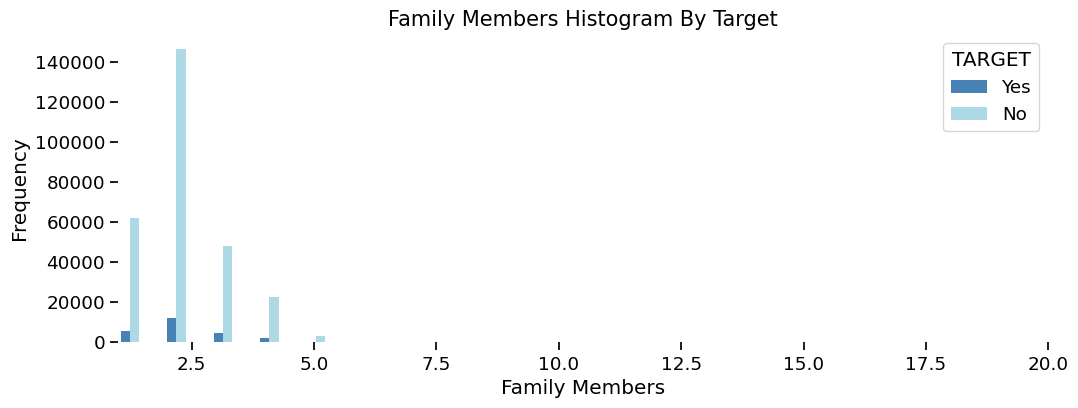

In [61]:
# Menampilkan grafik CNT_FAM_MEMBERS
x1 = list(app_train[app_train['TARGET'] == 1]['CNT_FAM_MEMBERS'])
x2 = list(app_train[app_train['TARGET'] == 0]['CNT_FAM_MEMBERS'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([app_train['CNT_FAM_MEMBERS'].min(),app_train['CNT_FAM_MEMBERS'].max()])
plt.legend(['Yes', 'No'], title = 'TARGET', loc='upper right', facecolor='white')
plt.xlabel('Family Members')
plt.ylabel('Frequency')
plt.title('Family Members Histogram By Target', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

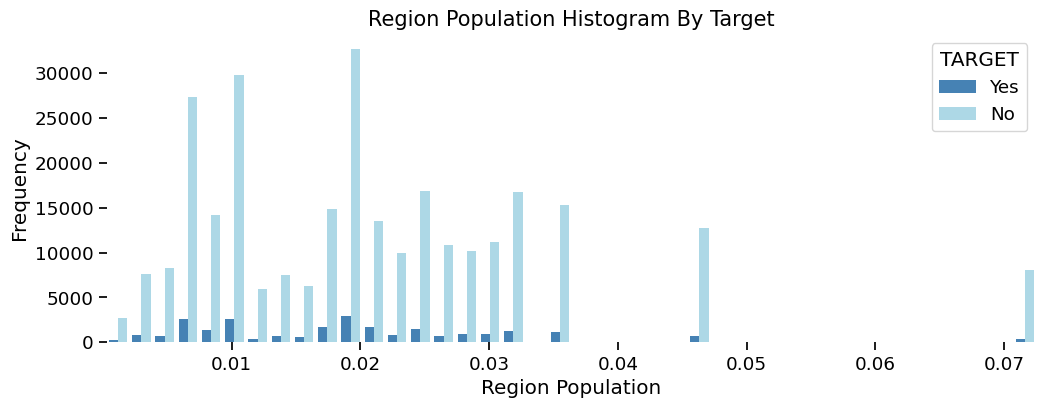

In [62]:
# Menampilkan grafik REGION_POPULATION_RELATIVE
x1 = list(app_train[app_train['TARGET'] == 1]['REGION_POPULATION_RELATIVE'])
x2 = list(app_train[app_train['TARGET'] == 0]['REGION_POPULATION_RELATIVE'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([app_train['REGION_POPULATION_RELATIVE'].min(),app_train['REGION_POPULATION_RELATIVE'].max()])
plt.legend(['Yes', 'No'], title = 'TARGET', loc='upper right', facecolor='white')
plt.xlabel('Region Population')
plt.ylabel('Frequency')
plt.title('Region Population Histogram By Target', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

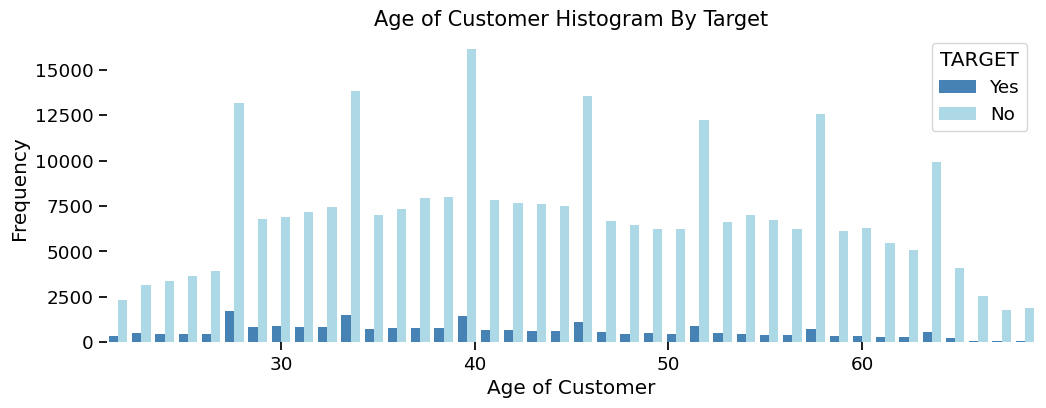

In [63]:
# Menampilkan grafik AGE
x1 = list(app_train[app_train['TARGET'] == 1]['AGE'])
x2 = list(app_train[app_train['TARGET'] == 0]['AGE'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([app_train['AGE'].min(),app_train['AGE'].max()])
plt.legend(['Yes', 'No'], title = 'TARGET', loc='upper right', facecolor='white')
plt.xlabel('Age of Customer')
plt.ylabel('Frequency')
plt.title('Age of Customer Histogram By Target', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

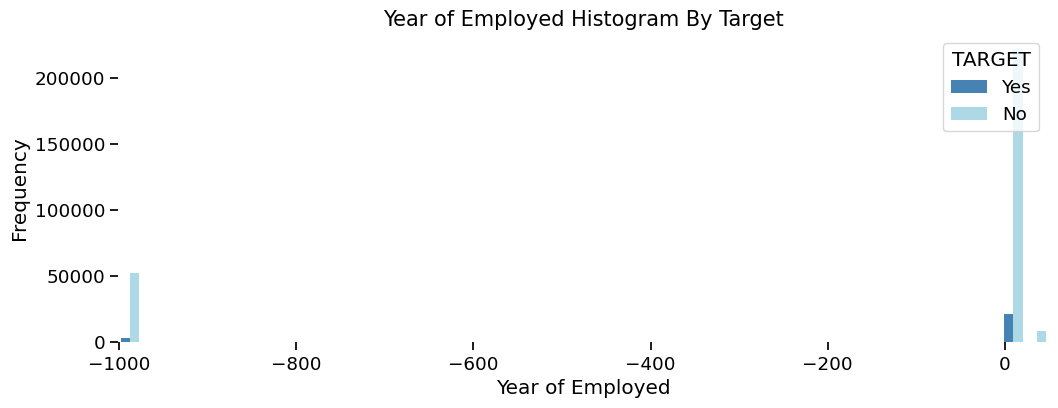

In [64]:
# Menampilkan grafik YEAR_EMPLOYED
x1 = list(app_train[app_train['TARGET'] == 1]['YEAR_EMPLOYED'])
x2 = list(app_train[app_train['TARGET'] == 0]['YEAR_EMPLOYED'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([app_train['YEAR_EMPLOYED'].min(),app_train['YEAR_EMPLOYED'].max()])
plt.legend(['Yes', 'No'], title = 'TARGET', loc='upper right', facecolor='white')
plt.xlabel('Year of Employed')
plt.ylabel('Frequency')
plt.title('Year of Employed Histogram By Target', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

Pada tahun pekerjaan seorang customer, ada data missing value berupa `-1000` tahun, hal ini tentu saja tidak masuk akal bagi seorang pekerja yang bekerja selama lebih dari 100 tahun

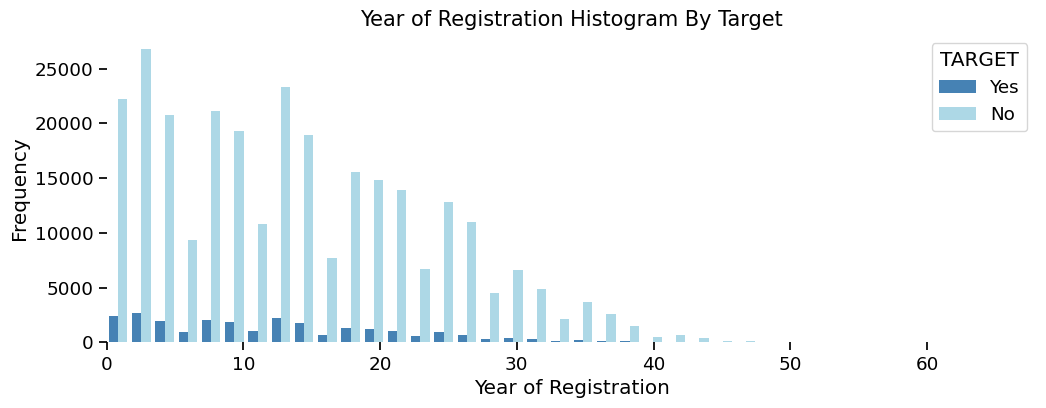

In [65]:
# Menampilkan grafik YEAR_REGISTRATION
x1 = list(app_train[app_train['TARGET'] == 1]['YEAR_REGISTRATION'])
x2 = list(app_train[app_train['TARGET'] == 0]['YEAR_REGISTRATION'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([app_train['YEAR_REGISTRATION'].min(),app_train['YEAR_REGISTRATION'].max()])
plt.legend(['Yes', 'No'], title = 'TARGET', loc='upper right', facecolor='white')
plt.xlabel('Year of Registration')
plt.ylabel('Frequency')
plt.title('Year of Registration Histogram By Target', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

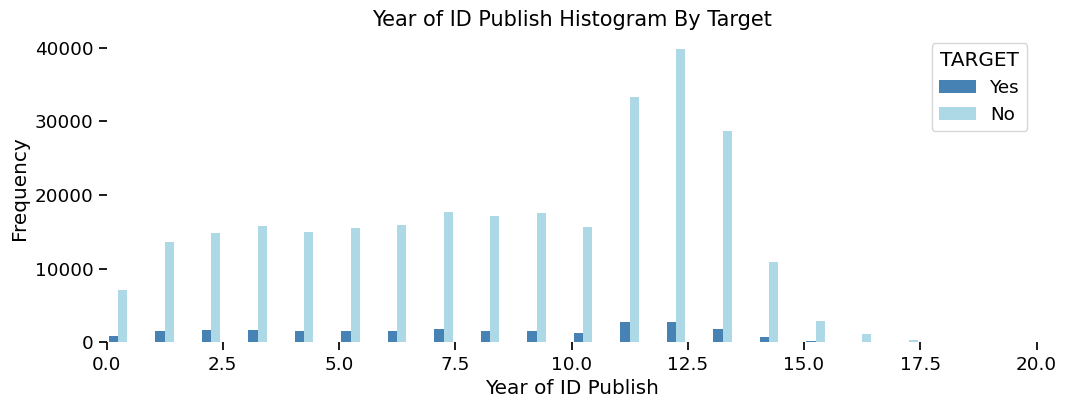

In [66]:
# Menampilkan grafik YEAR_ID_PUBLISH
x1 = list(app_train[app_train['TARGET'] == 1]['YEAR_ID_PUBLISH'])
x2 = list(app_train[app_train['TARGET'] == 0]['YEAR_ID_PUBLISH'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([app_train['YEAR_ID_PUBLISH'].min(),app_train['YEAR_ID_PUBLISH'].max()])
plt.legend(['Yes', 'No'], title = 'TARGET', loc='upper right', facecolor='white')
plt.xlabel('Year of ID Publish')
plt.ylabel('Frequency')
plt.title('Year of ID Publish Histogram By Target', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

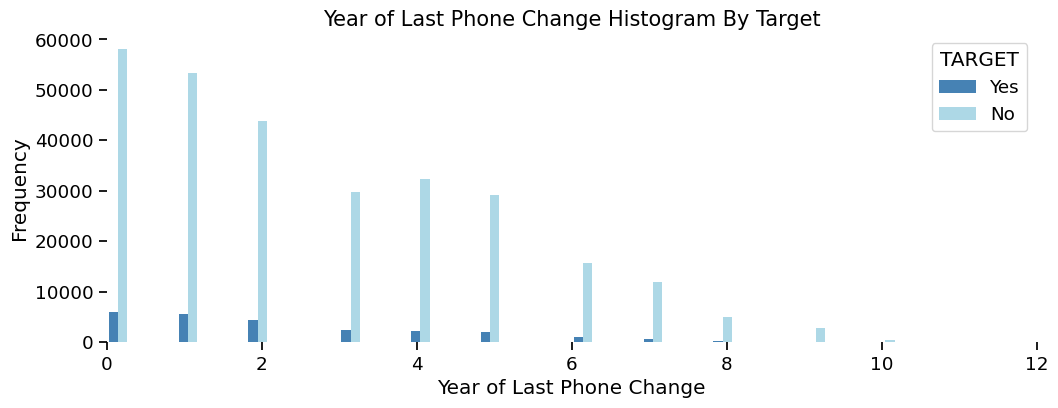

In [67]:
# Menampilkan grafik YEAR_LAST_PHONE_CHANGE
x1 = list(app_train[app_train['TARGET'] == 1]['YEAR_LAST_PHONE_CHANGE'])
x2 = list(app_train[app_train['TARGET'] == 0]['YEAR_LAST_PHONE_CHANGE'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([app_train['YEAR_LAST_PHONE_CHANGE'].min(),app_train['YEAR_LAST_PHONE_CHANGE'].max()])
plt.legend(['Yes', 'No'], title = 'TARGET', loc='upper right', facecolor='white')
plt.xlabel('Year of Last Phone Change')
plt.ylabel('Frequency')
plt.title('Year of Last Phone Change Histogram By Target', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

### Check Countplot Graph of Categorical 

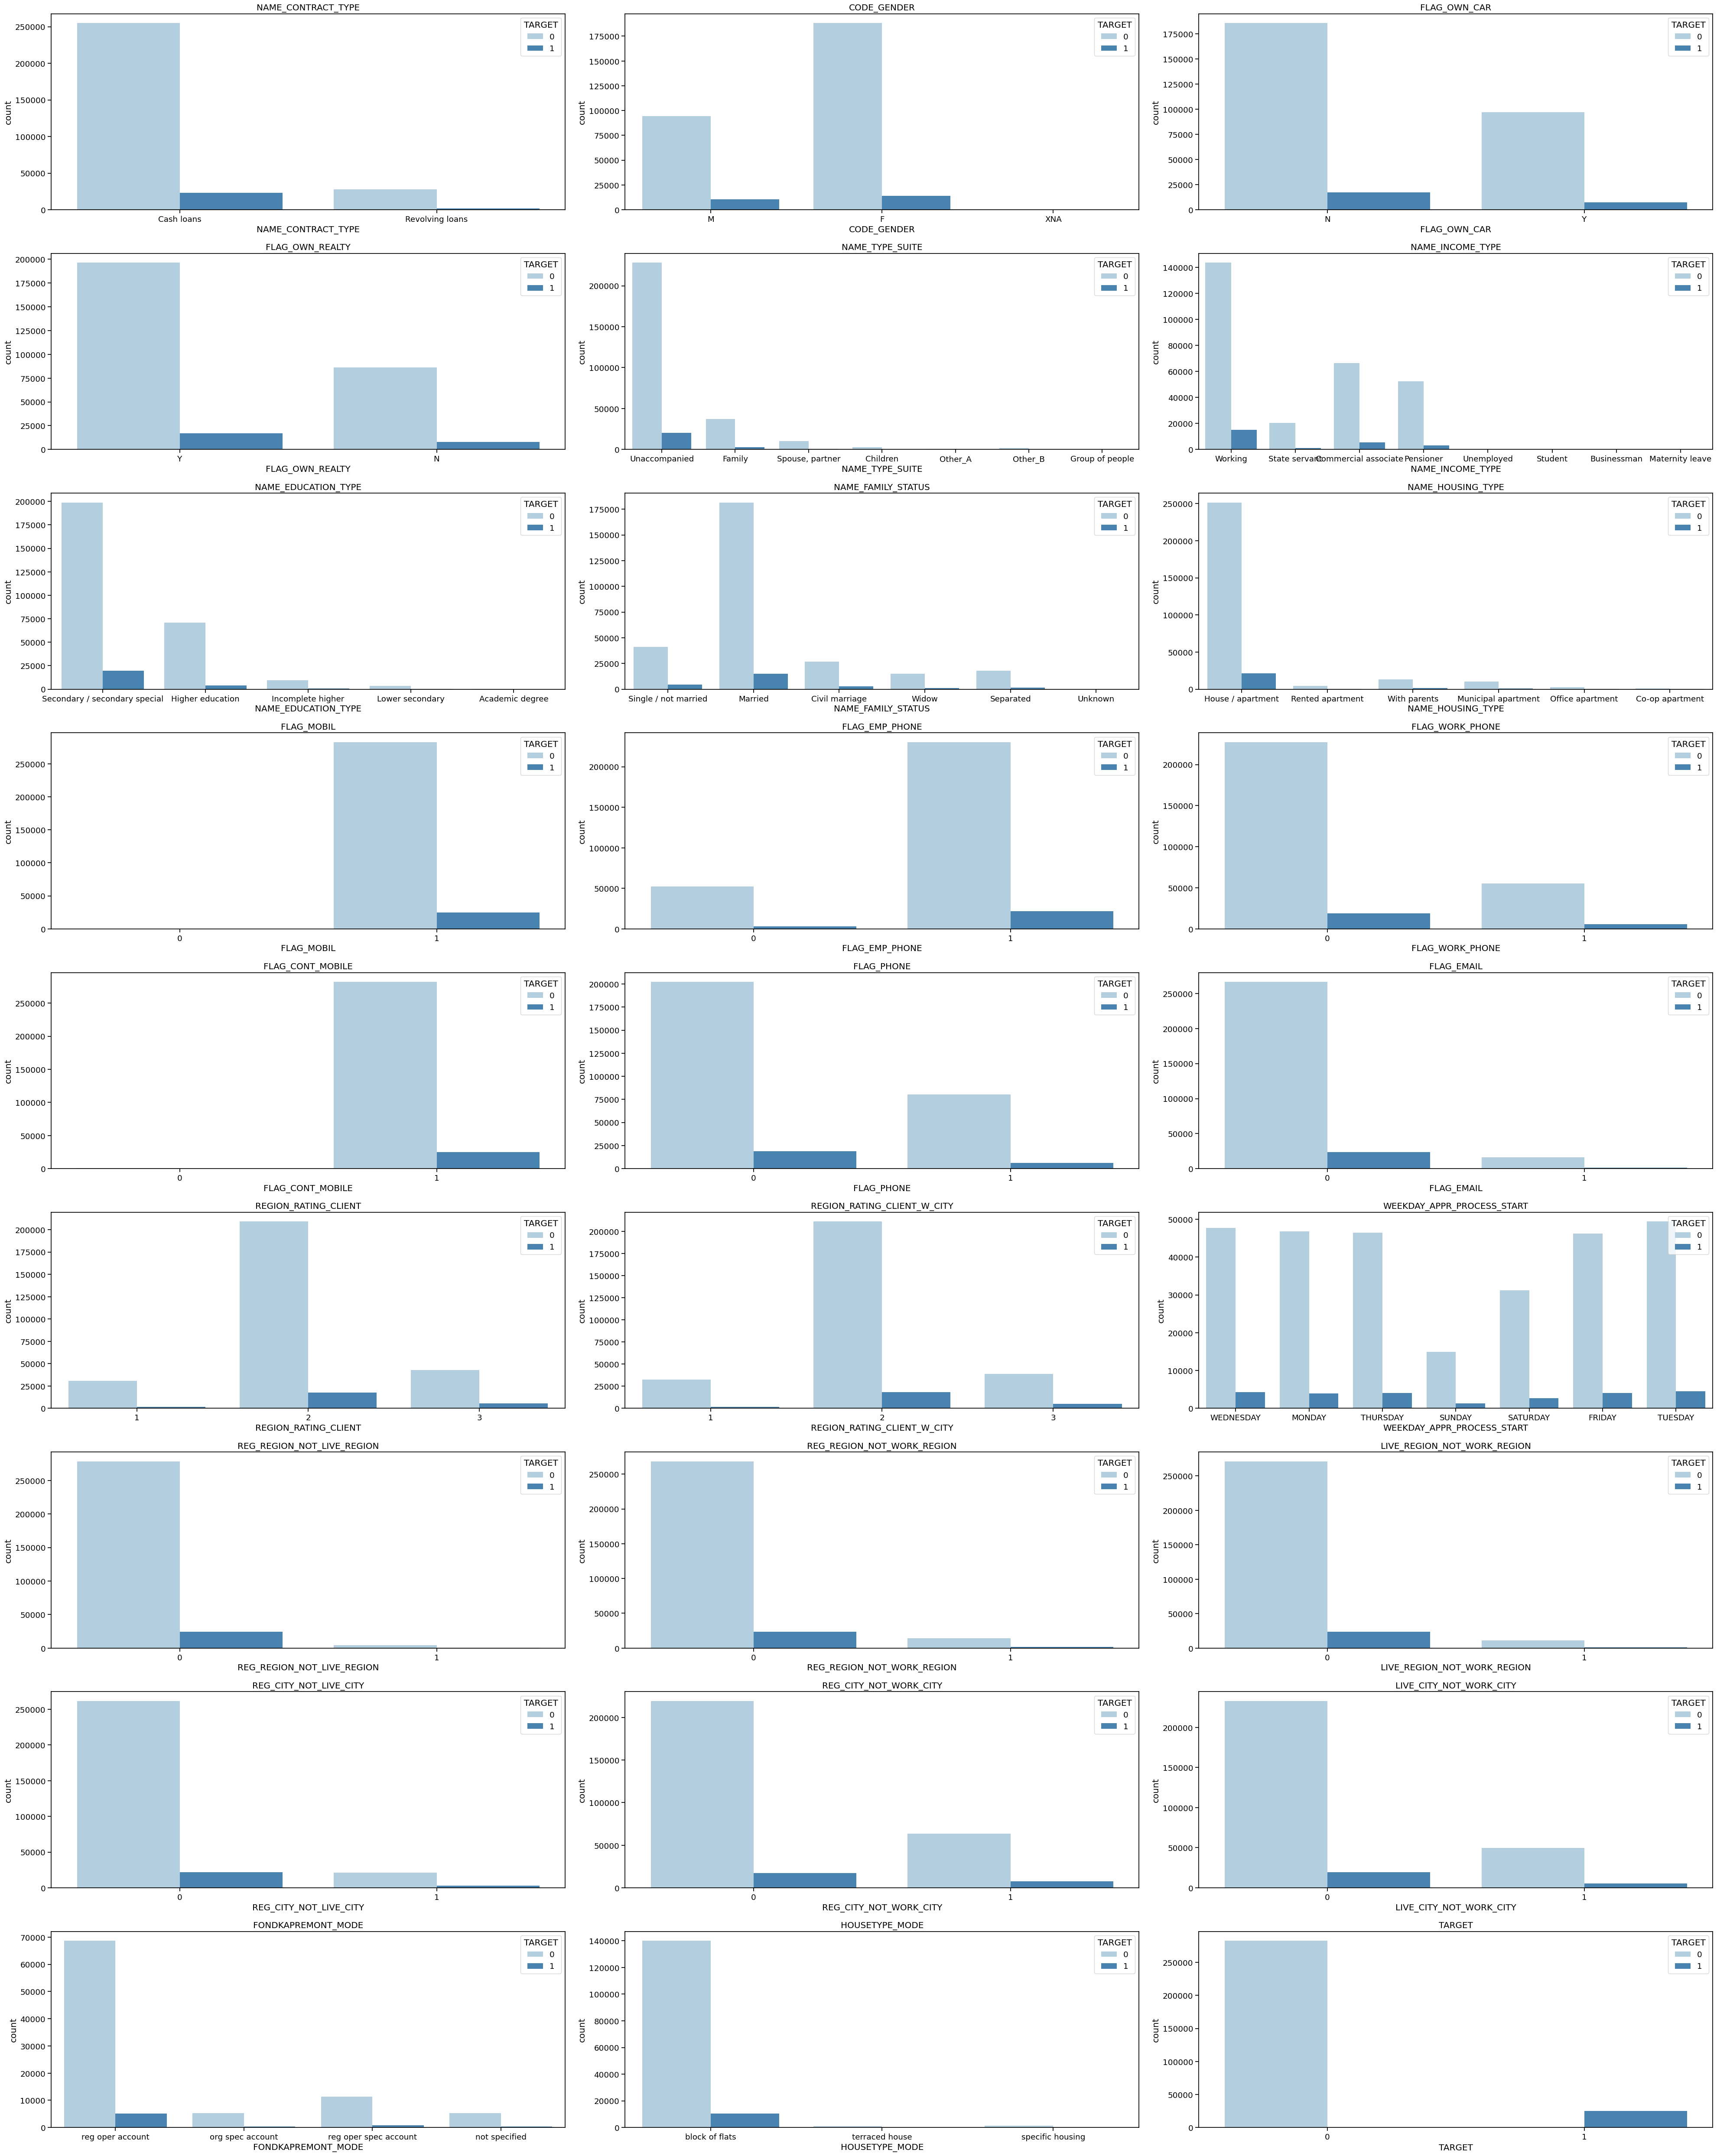

In [68]:
# Daftar nama kolom
cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
        'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FONDKAPREMONT_MODE','HOUSETYPE_MODE', 'TARGET']

# Membuat subplot
f, axes = plt.subplots(9, 3, figsize=(40, 50), facecolor='white')

# Membuat looping
for i, column in enumerate(cols):
    row = i // 3  # Nomor baris subplot
    col = i % 3   # Nomor kolom subplot
    
    # Menampilkan countplot
    ax = sns.countplot(x=column, hue='TARGET', data=app_train[cols], palette='Blues', ax=axes[row, col])
    ax.set_title(column)
    ax.legend(title='TARGET', loc='upper right')

# Menampilkan plot
plt.tight_layout()
plt.show()

Pada kolom `Gender`dan `Family Status` terdapat missing value berupa `XNA` dan `Unknown`

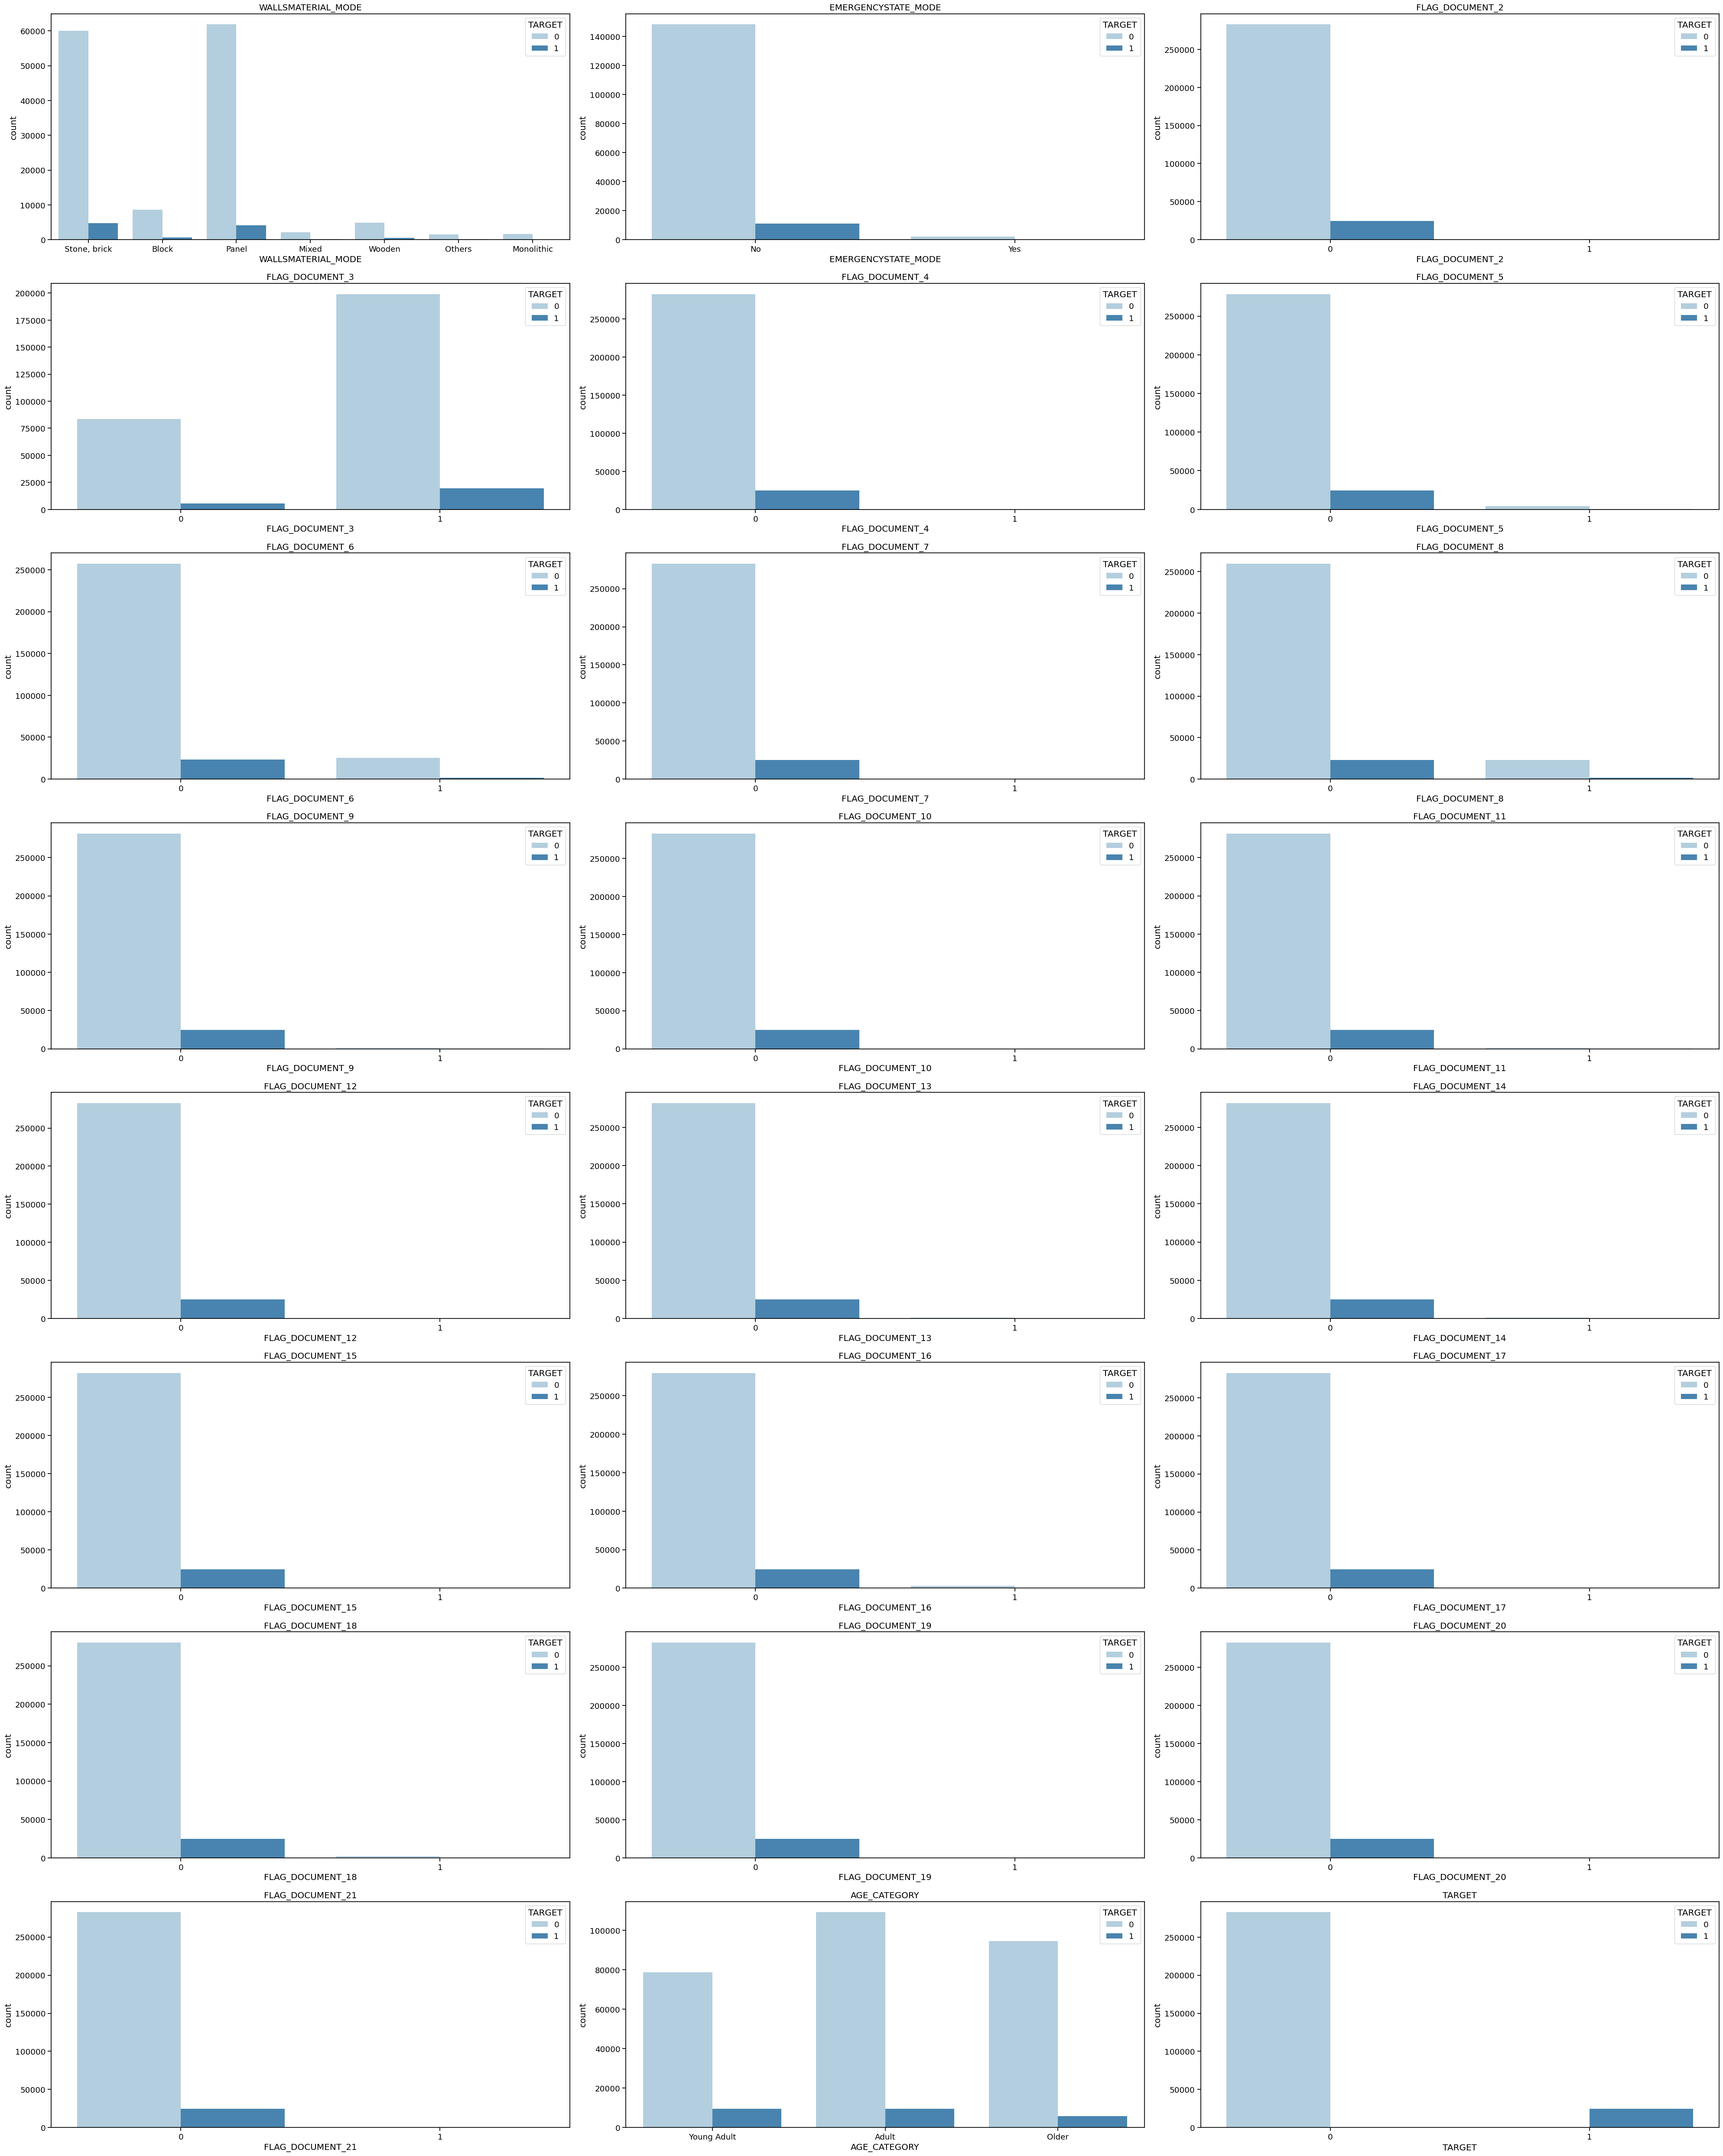

In [69]:
# Daftar nama kolom
cols = ['WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
        'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 
        'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
        'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AGE_CATEGORY', 'TARGET']

# Membuat subplot
f, axes = plt.subplots(8, 3, figsize=(40, 50), facecolor='white')

# Membuat looping
for i, column in enumerate(cols):
    row = i // 3  # Nomor baris subplot
    col = i % 3   # Nomor kolom subplot
    
    # Menampilkan countplot
    ax = sns.countplot(x=column, hue='TARGET', data=app_train[cols], palette='Blues', ax=axes[row, col])
    ax.set_title(column)
    ax.legend(title='TARGET', loc='upper right')

# Menampilkan plot
plt.tight_layout()
plt.show()

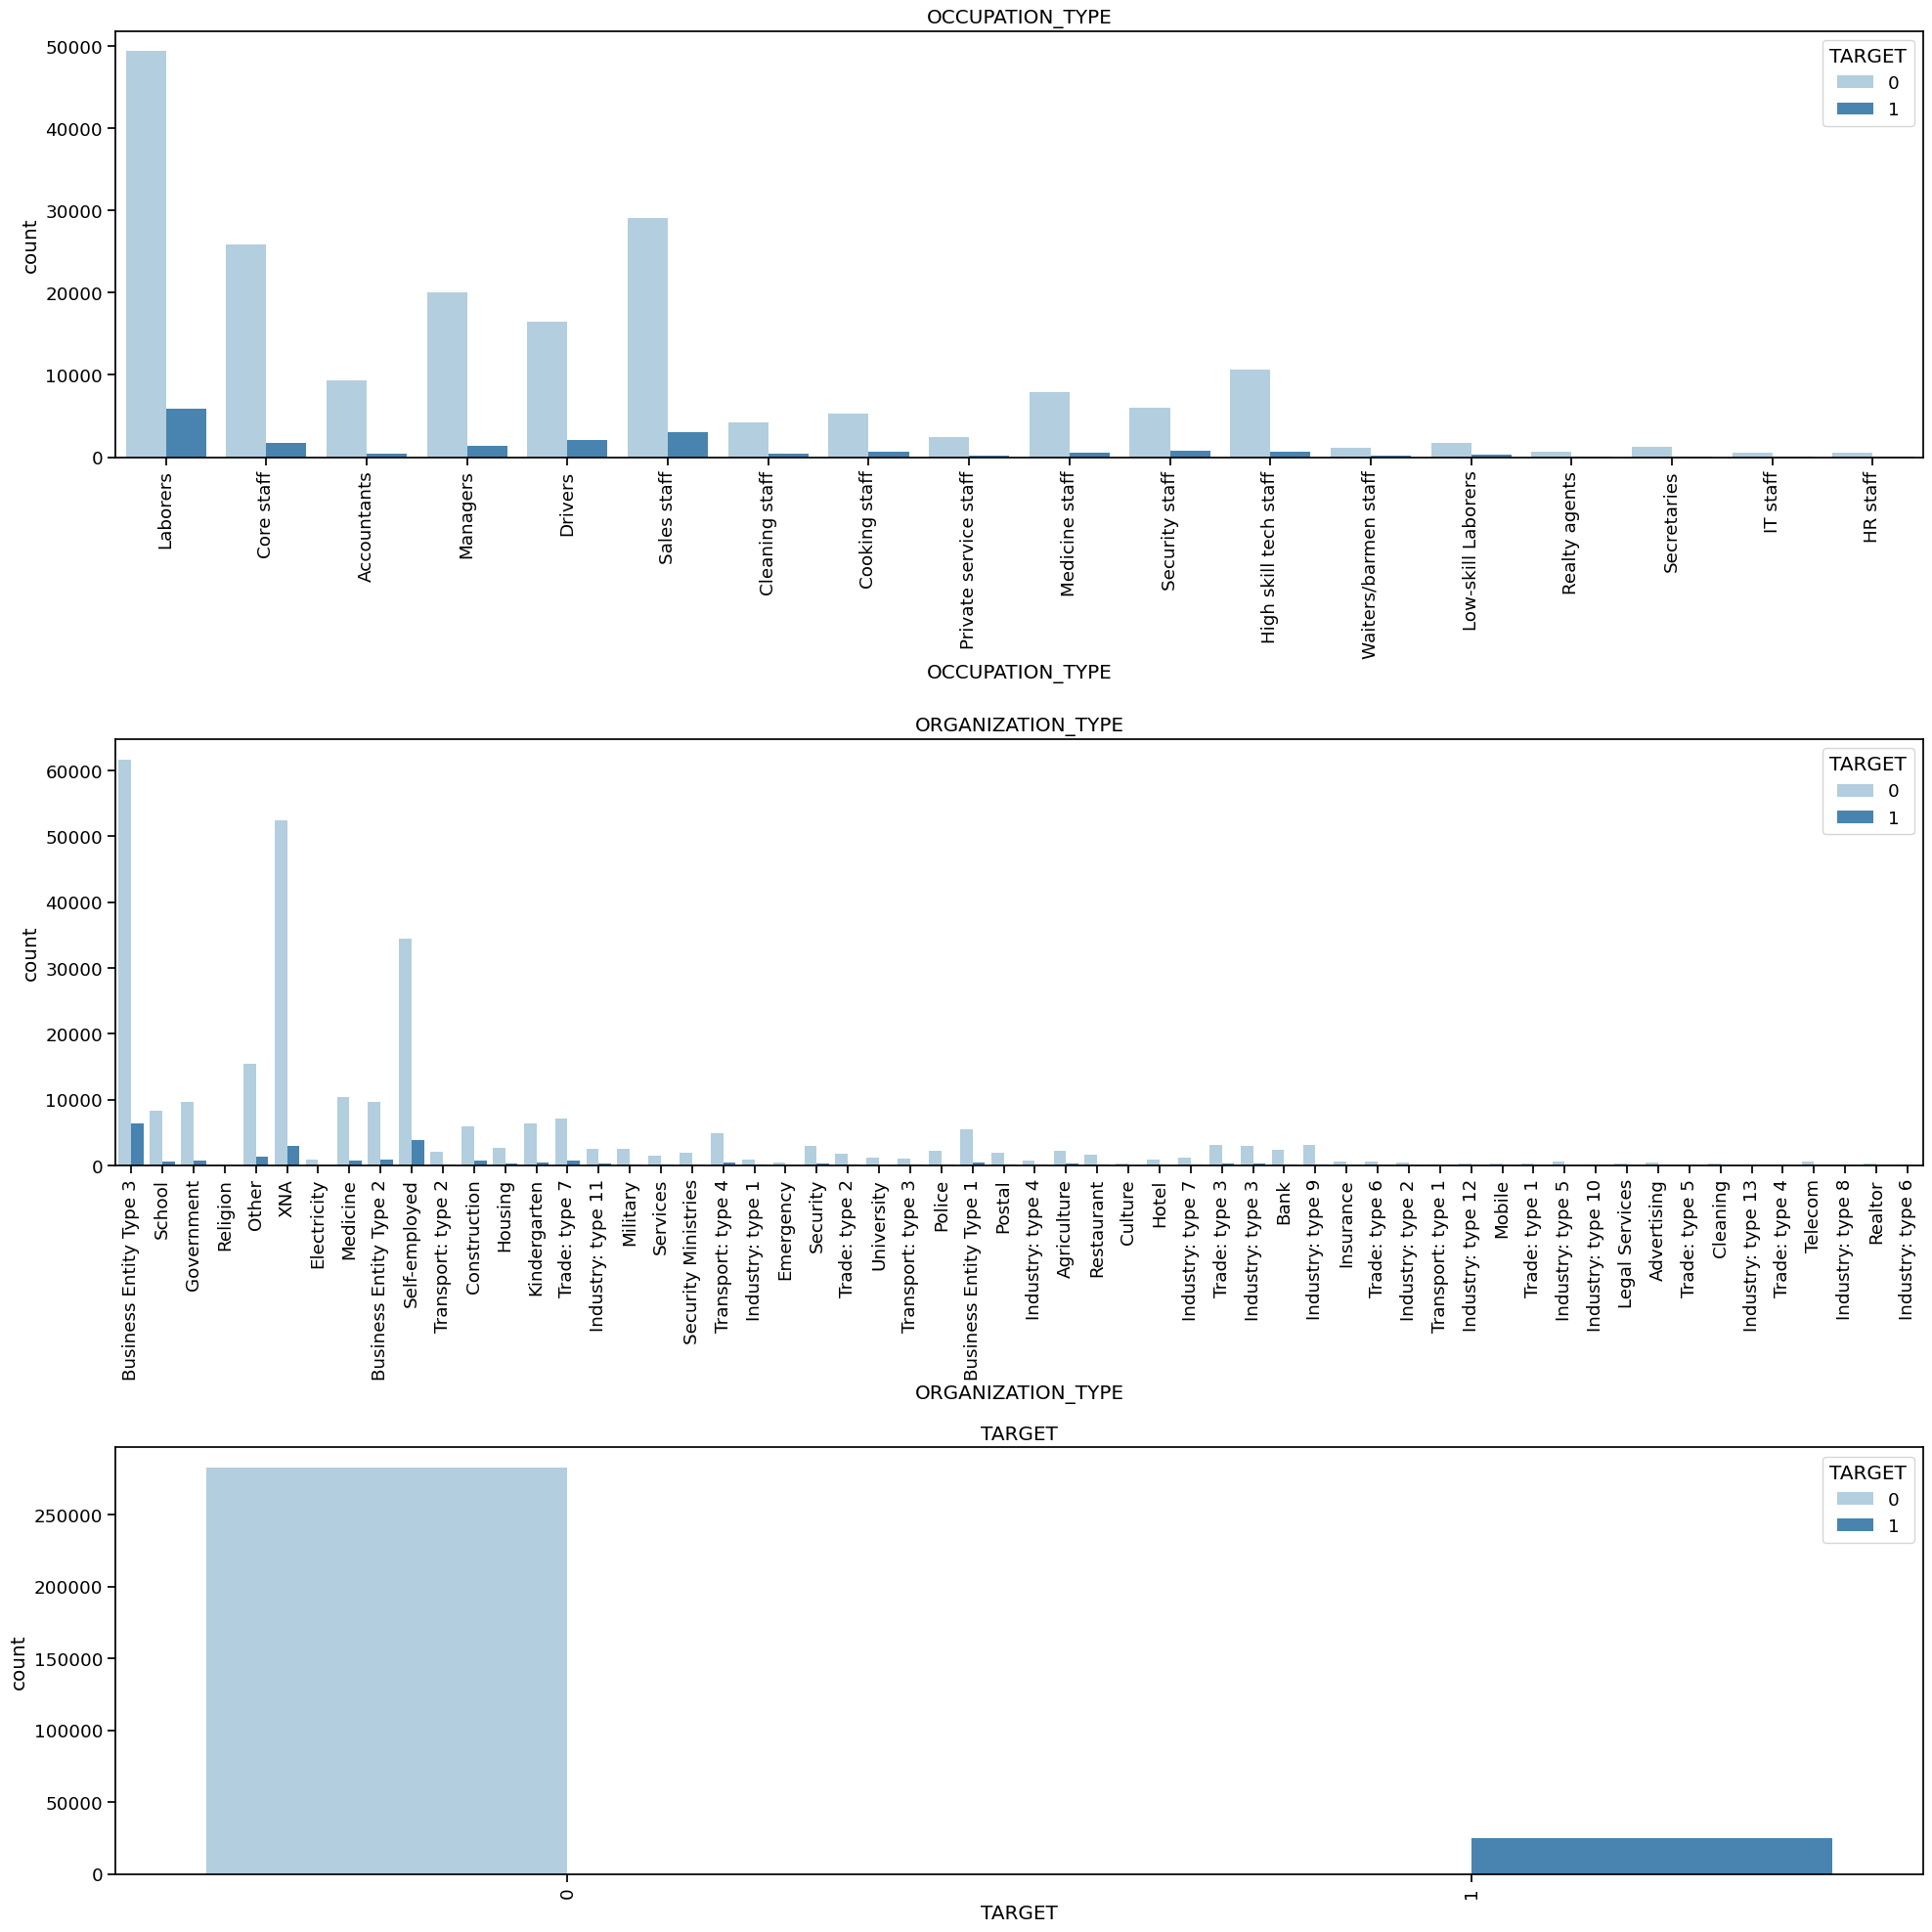

In [70]:
# Daftar nama kolom
cols = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'TARGET']

# Membuat subplot
f, axes = plt.subplots(3, 1, figsize=(20, 20), facecolor='white')

# Membuat looping
for i, column in enumerate(cols):
    row = i // 1  # Nomor baris subplot
    col = i % 1   # Nomor kolom subplot
    
    # Menampilkan countplot
    ax = sns.countplot(x=column, hue='TARGET', data=app_train[cols], palette='Blues', ax=axes[row])
    ax.set_title(column)
    ax.legend(title='TARGET', loc='upper right')
    
    # Memutar label sumbu x
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Menampilkan plot
plt.tight_layout()
plt.show()

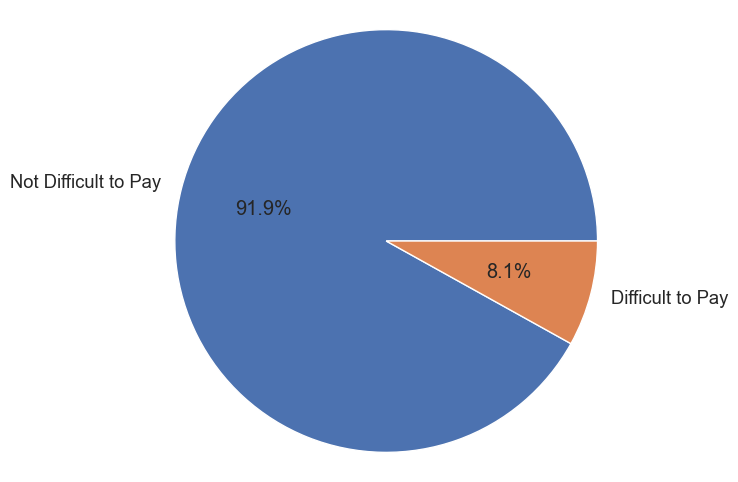

In [71]:
# check data (balance/inbalance)
plt.figure(figsize=(6, 6))
sns.set_palette("pastel")
sns.set(font_scale=1.2)
plt.pie(app_train['TARGET'].value_counts(), labels=['Not Difficult to Pay', 'Difficult to Pay'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Diketahui bahwa data target(binary) memiliki data yang inbalance

### Check Distribusi Data

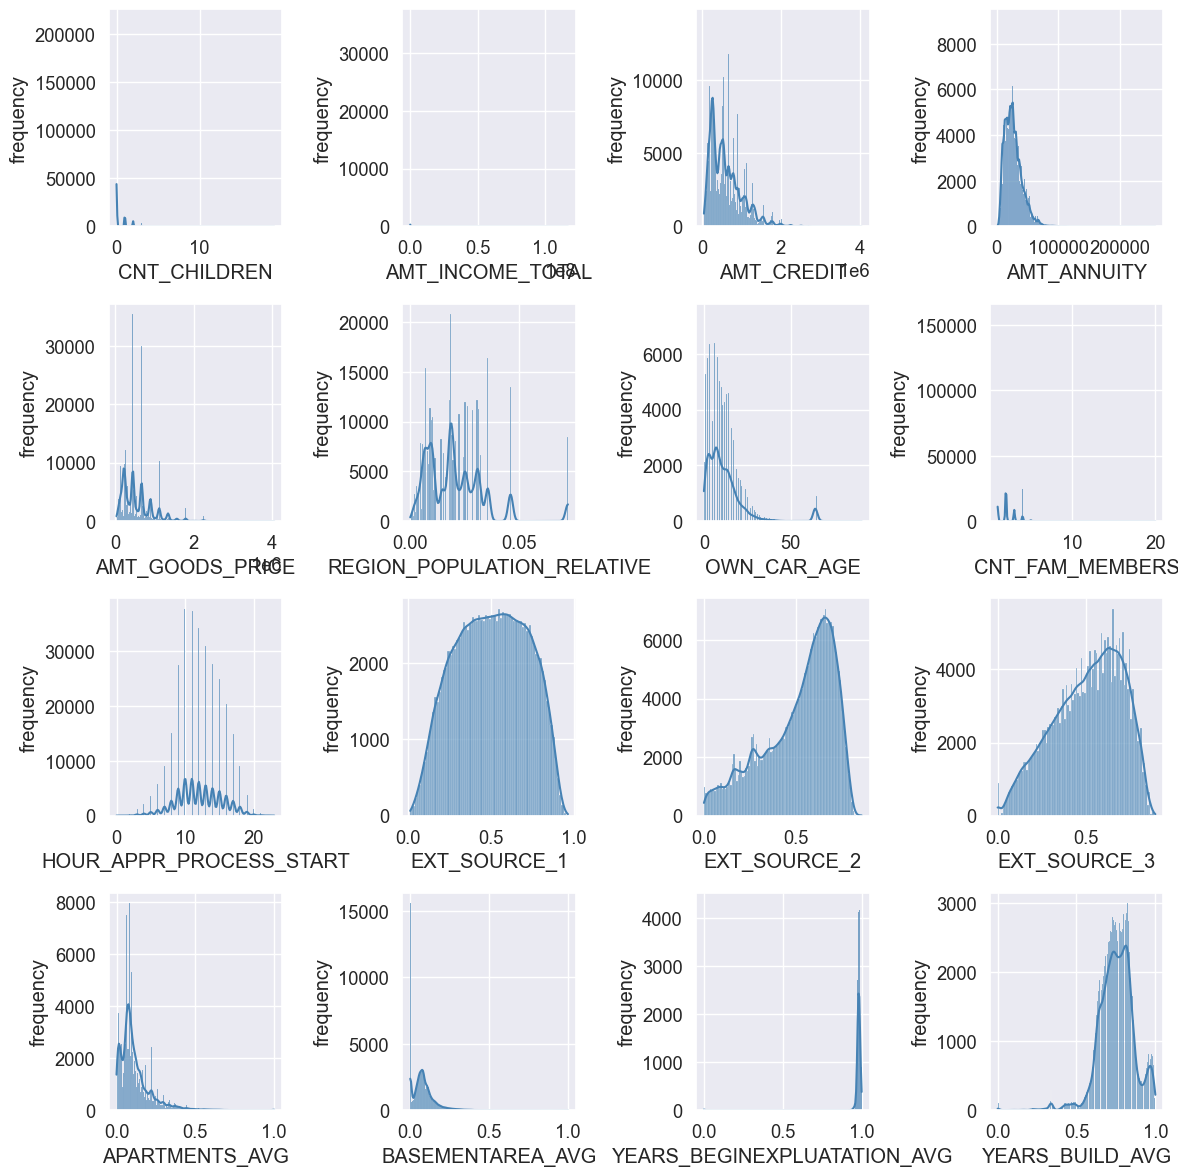

In [72]:
# Membuat subplot dengan ukuran 4 x 4
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

# Mendapatkan daftar kolom dalam DataFrame
columns = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
           'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
           'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG']

# Melakukan looping untuk membuat histogram pada setiap kolom
for i, ax in enumerate(axes.flatten()):
    if i < len(columns):
        # Membuat histogram
        sns.histplot(data=app_train, x=columns[i], kde=True, color='steelblue', alpha=0.7, ax=ax)
        ax.set_xlabel(columns[i])
        ax.set_ylabel('frequency')

# Menyusun tata letak subplot
plt.tight_layout()

# Menampilkan plot
plt.show()

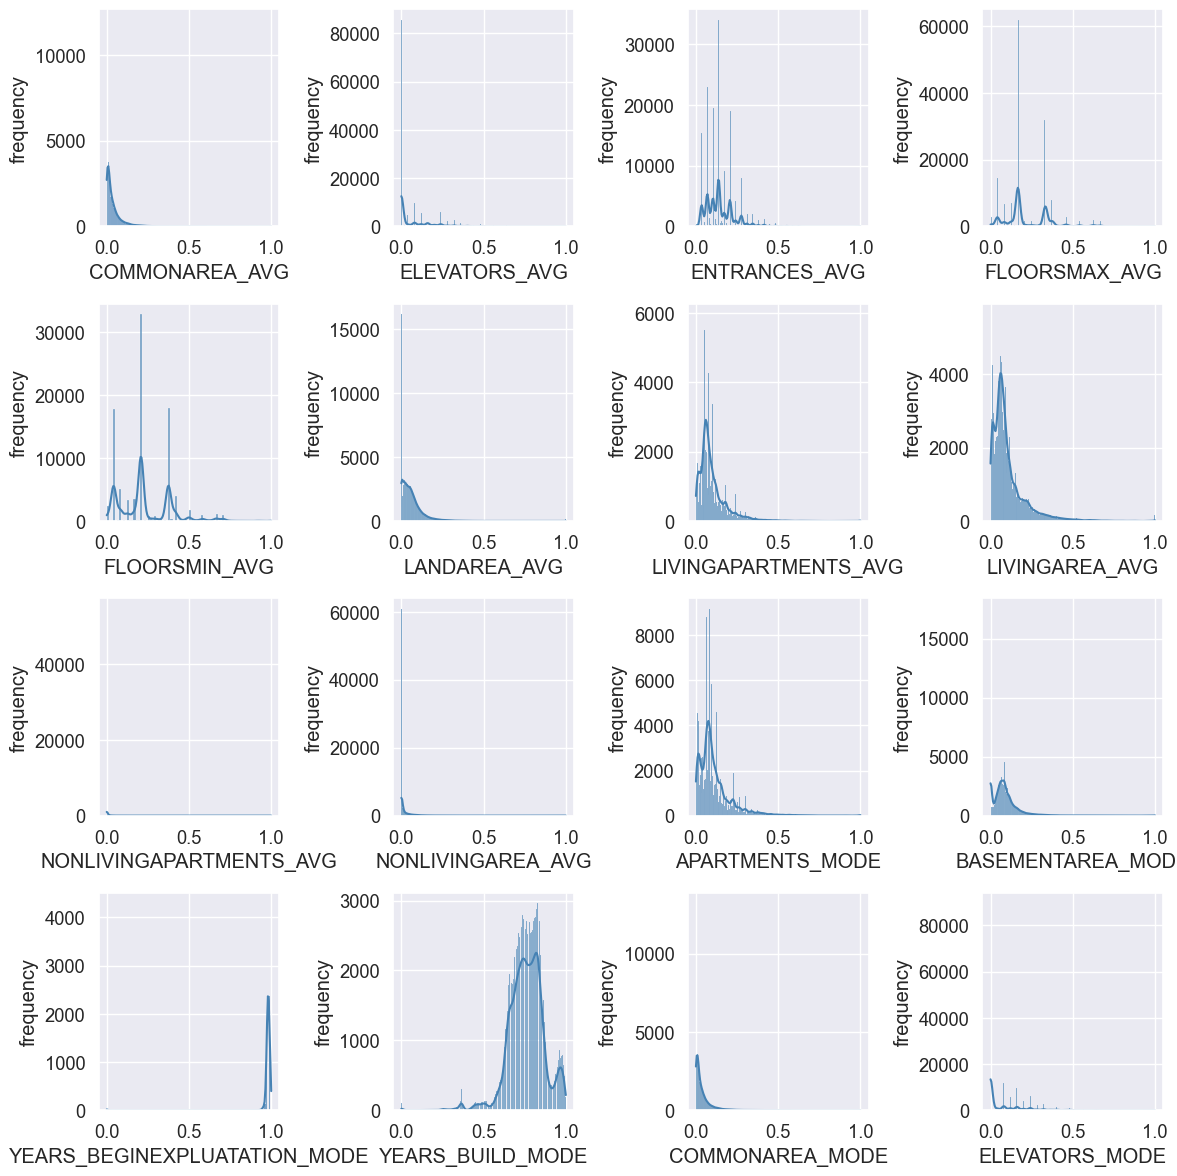

In [73]:
# Membuat subplot dengan ukuran 4 x 4
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

# Mendapatkan daftar kolom dalam DataFrame
columns = ['COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
           'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
           'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE']

# Melakukan looping untuk membuat histogram pada setiap kolom
for i, ax in enumerate(axes.flatten()):
    if i < len(columns):
        # Membuat histogram
        sns.histplot(data=app_train, x=columns[i], kde=True, color='steelblue', alpha=0.7, ax=ax)
        ax.set_xlabel(columns[i])
        ax.set_ylabel('frequency')

# Menyusun tata letak subplot
plt.tight_layout()

# Menampilkan plot
plt.show()

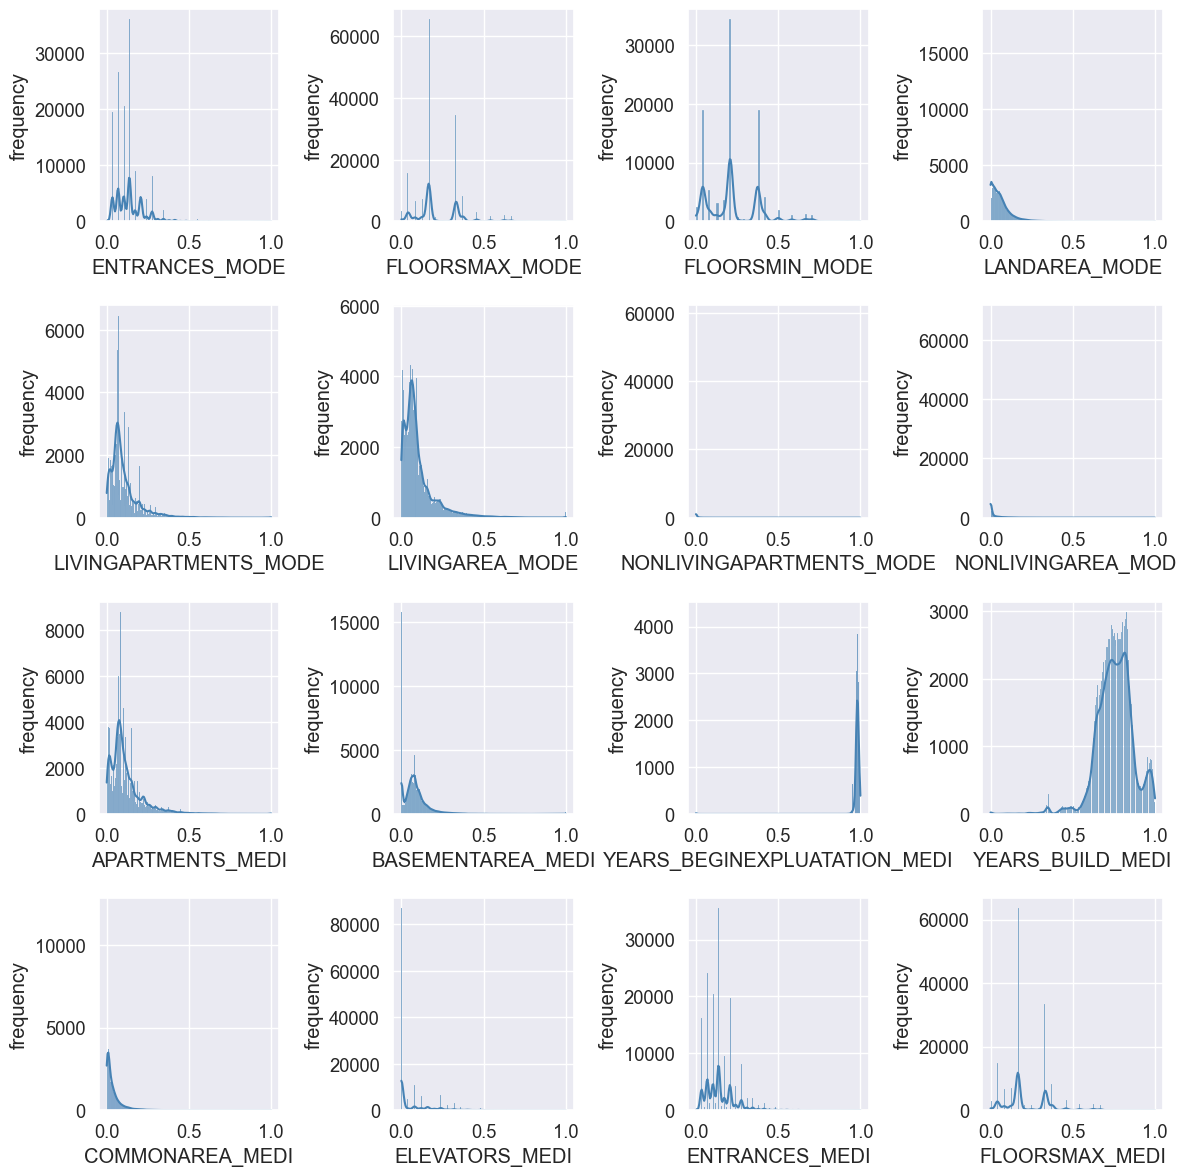

In [74]:
# Membuat subplot dengan ukuran 4 x 4
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

# Mendapatkan daftar kolom dalam DataFrame
columns = ['ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 
           'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
           'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI']

# Melakukan looping untuk membuat histogram pada setiap kolom
for i, ax in enumerate(axes.flatten()):
    if i < len(columns):
        # Membuat histogram
        sns.histplot(data=app_train, x=columns[i], kde=True, color='steelblue', alpha=0.7, ax=ax)
        ax.set_xlabel(columns[i])
        ax.set_ylabel('frequency')

# Menyusun tata letak subplot
plt.tight_layout()

# Menampilkan plot
plt.show()

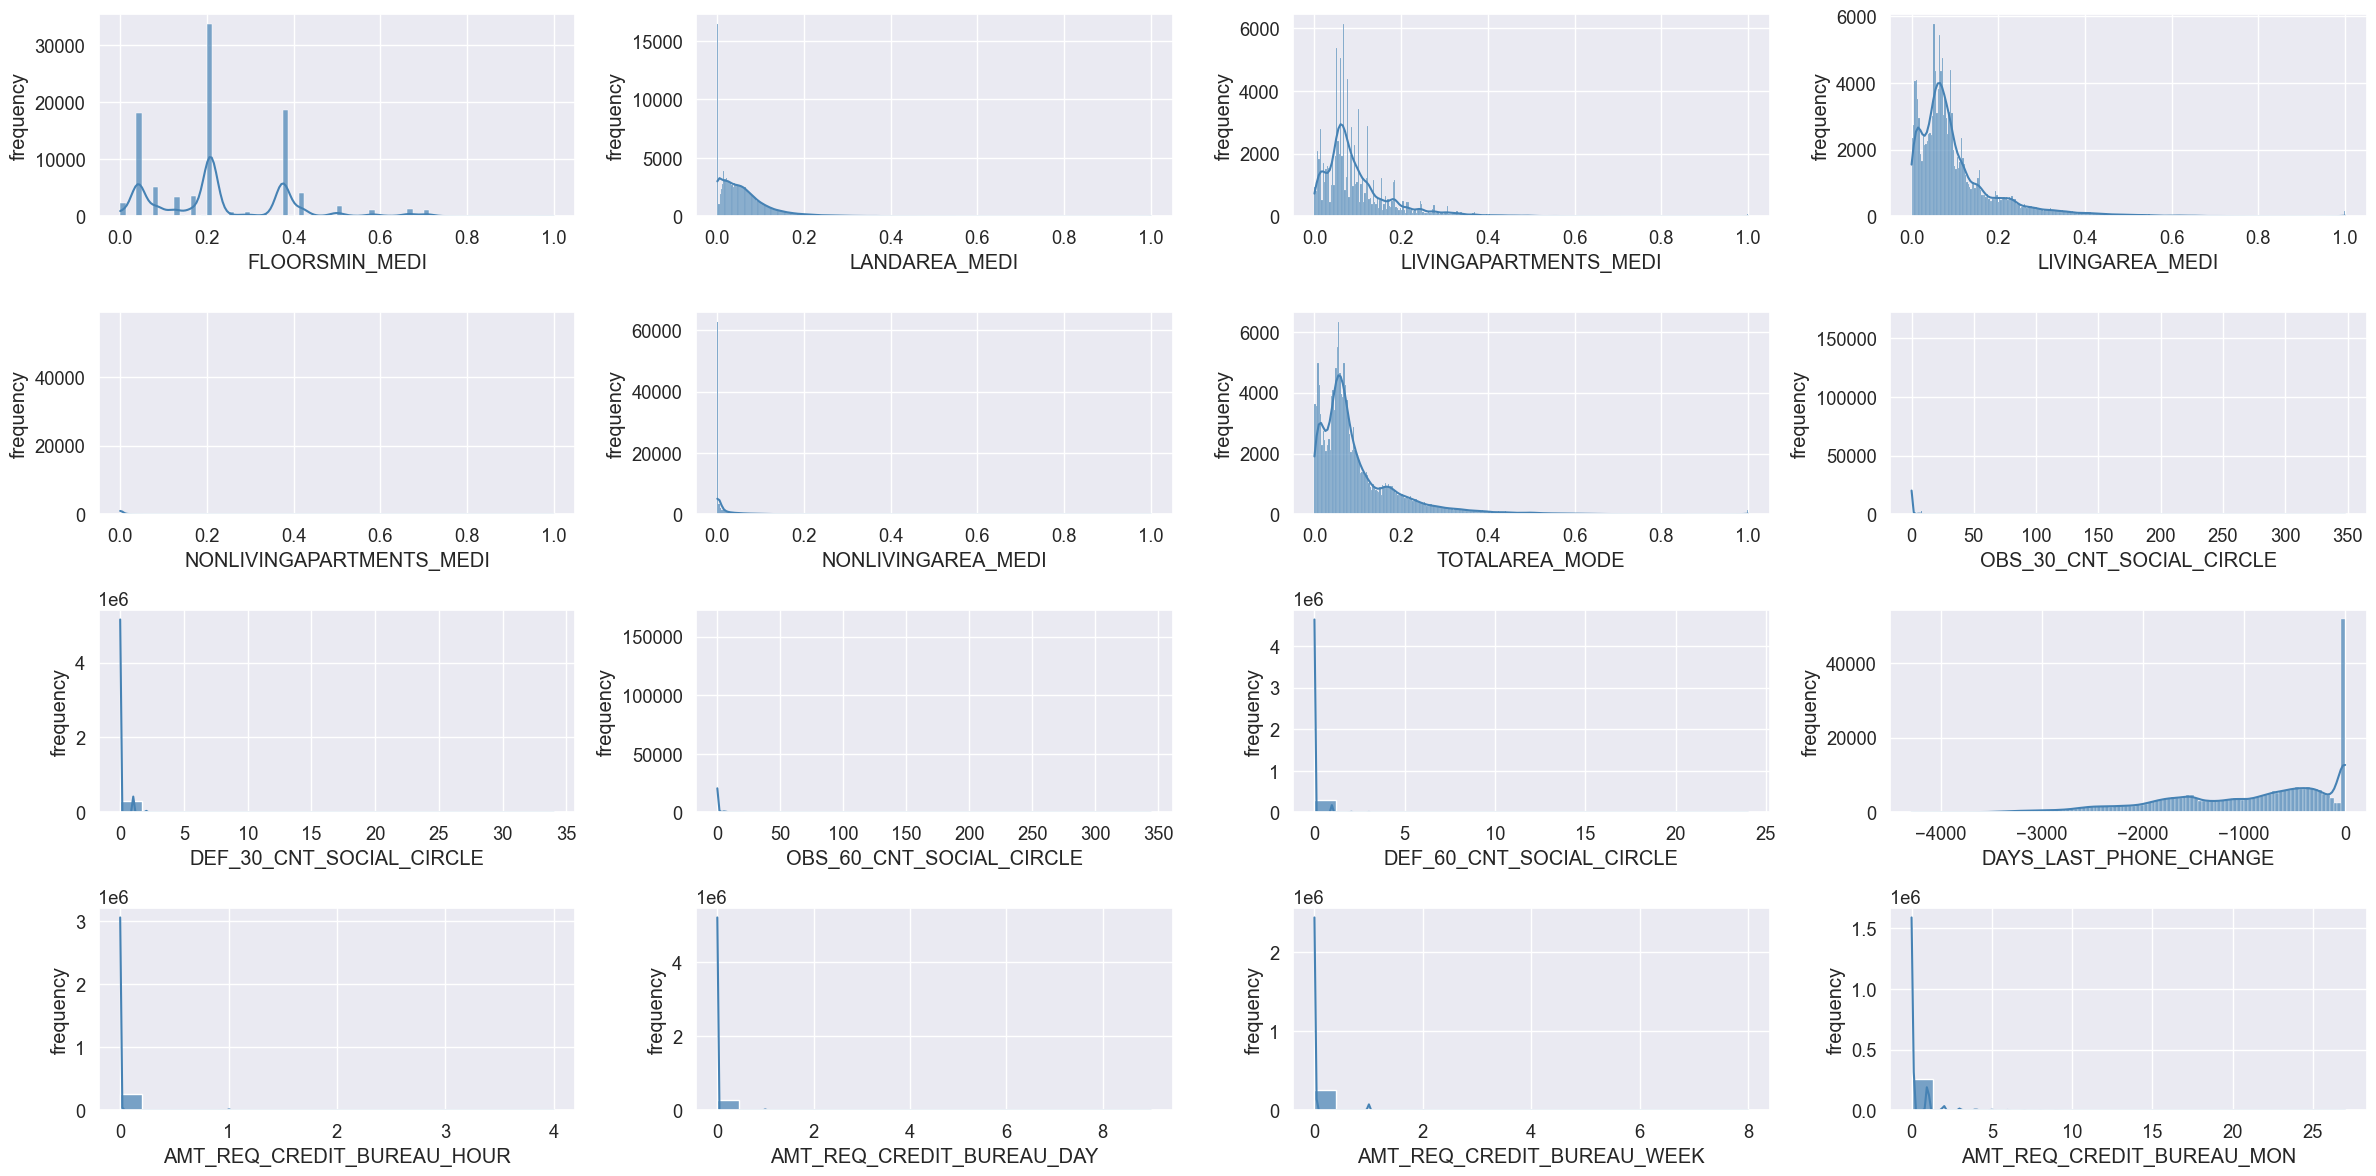

In [75]:
# Membuat subplot dengan ukuran 4 x 4
fig, axes = plt.subplots(4, 4, figsize=(24, 12))

# Mendapatkan daftar kolom dalam DataFrame
columns = ['FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
           'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 
           'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
           'AMT_REQ_CREDIT_BUREAU_MON']

# Melakukan looping untuk membuat histogram pada setiap kolom
for i, ax in enumerate(axes.flatten()):
    if i < len(columns):
        # Membuat histogram
        sns.histplot(data=app_train, x=columns[i], kde=True, color='steelblue', alpha=0.7, ax=ax)
        ax.set_xlabel(columns[i])
        ax.set_ylabel('frequency')

# Menyusun tata letak subplot
plt.tight_layout()

# Menampilkan plot
plt.show()

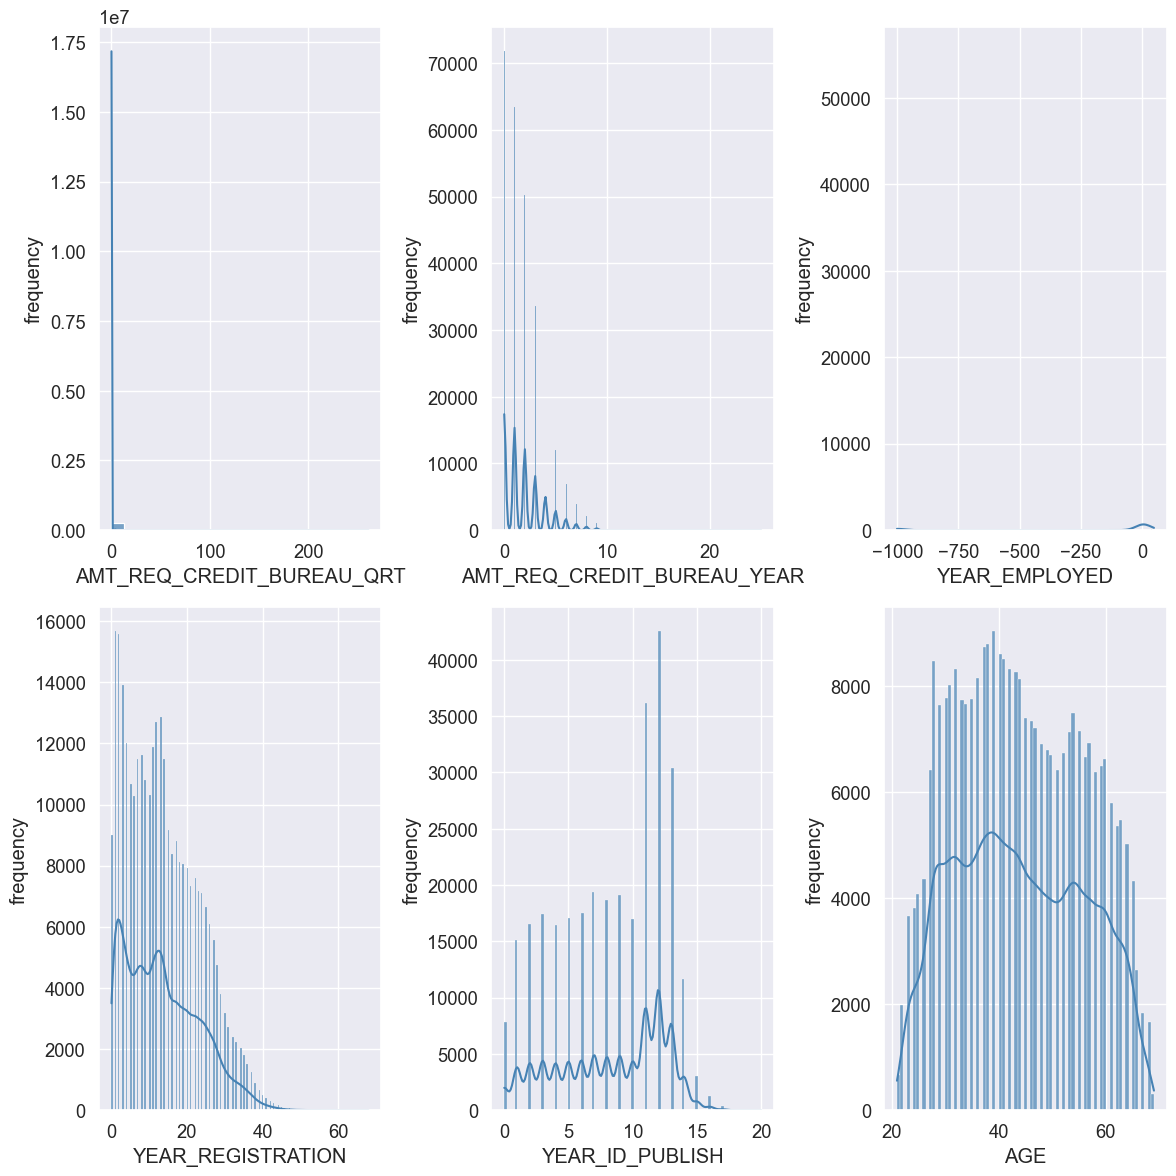

In [76]:
# Membuat subplot dengan ukuran 2 x 3
fig, axes = plt.subplots(2, 3, figsize=(12, 12))

# Mendapatkan daftar kolom dalam DataFrame
columns = ['AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEAR_EMPLOYED', 'YEAR_REGISTRATION',
           'YEAR_ID_PUBLISH', 'AGE']

# Melakukan looping untuk membuat histogram pada setiap kolom
for i, ax in enumerate(axes.flatten()):
    if i < len(columns):
        # Membuat histogram
        sns.histplot(data=app_train, x=columns[i], kde=True, color='steelblue', alpha=0.7, ax=ax)
        ax.set_xlabel(columns[i])
        ax.set_ylabel('frequency')

# Menyusun tata letak subplot
plt.tight_layout()

# Menampilkan plot
plt.show()

**Exploratory Data Analysis :**


Berdasarkan analisis terhadap berbagai faktor yang mempengaruhi perilaku pelanggan dalam membayar pinjaman, beberapa kesimpulan dapat diambil. Pertama, pelanggan dengan pendapatan total yang rendah, jumlah kredit yang kecil, harga barang yang terbatas, dan anuitas pinjaman yang rendah cenderung mengalami kesulitan dalam membayar pinjaman. Keluarga dengan jumlah anggota yang sedikit, usia pelanggan muda, dan status baru mendapatkan pekerjaan juga dapat menghadapi kesulitan dalam pembayaran.

Selanjutnya, jenis kontrak pinjaman (cash loans), kepemilikan real estate tanpa keinginan memiliki mobil, dan status perkawinan juga berpotensi menjadi faktor yang sulit membayar pinjaman. Tipe penghuni yang tidak didampingi (unaccompanied) dan pendidikan menengah khusus (secondary special) juga dapat mempengaruhi perilaku pelanggan dalam membayar pinjaman.

Selain itu, sumber pendapatan dari pekerjaan (working), asosiasi komersial (commercial associate), dan pensiunan (pensioner) serta kepemilikan aset rumah atau apartemen dapat berhubungan dengan kesulitan pembayaran pinjaman. Tidak memiliki telepon kerja, tetapi memiliki telepon seluler dan rumah yang mudah dihubungi melalui telepon tanpa email juga dapat menjadi indikasi kesulitan dalam pembayaran pinjaman.

Faktor lain yang dapat mempengaruhi perilaku pelanggan adalah rating wilayah tinggal, alamat permanen dan alamat kontak yang sama, tipe hunian blok apartemen, dan bahan bangunan rumah. Pelanggan yang tidak menyediakan seluruh dokumen yang diperlukan juga dapat menghadapi kesulitan dalam membayar pinjaman.

Terakhir, jenis pekerjaan seperti buruh, staf inti, pengemudi, manajer, dan staf penjualan, serta jenis organisasi atau perusahaan tertentu (business entity type 3, XNA, dan self-employed) dapat berhubungan dengan kesulitan dalam pembayaran pinjaman.

Kesimpulannya, ada banyak faktor yang dapat mempengaruhi perilaku pelanggan dalam membayar pinjaman. Faktor-faktor seperti pendapatan rendah, jumlah kredit, harga barang, anuitas pinjaman, keluarga, status pekerjaan, kepemilikan aset, jenis kontrak pinjaman, tipe penghuni, pendidikan, status perkawinan, jenis rumah, dokumen yang disediakan, jenis pekerjaan, dan jenis organisasi/perusahaan semua dapat berkontribusi terhadap kesulitan pelanggan dalam membayar pinjaman.

## **D. Feature Engineering**

### Data Cleaning

In [77]:
# make a csv file
app_train.to_csv('app_train_new.csv', index=False)

In [78]:
# relace into missing value
app_train.replace(-1001, np.nan, inplace=True) # year_employed
app_train.replace('XNA', np.nan, inplace=True) # gender & organization_type
app_train.replace('Unknown', np.nan, inplace=True) # name_family_status

#### Check Missing Value

In [79]:
# define a function to calculate missing value
def missing_value(df):
    # total missing values
    mis_val = df.isnull().sum()
    
    # percentage of missing values
    mis_val_percent = 100 * mis_val/len(df)
    
    # make a table/dataframe with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    #rename the columns
    mis_val_table = mis_val_table.rename(columns={0 : 'Missing Values', 1 : '% of Missing Values'})
    
    # sort the table by percentage of missing descending
    mis_val_table = mis_val_table[mis_val_table.iloc[:,1] != 0].sort_values('% of Missing Values', ascending=False).round(1)
    
    # return the dataframe
    return mis_val_table

In [80]:
# missing value statistic
missing_values = missing_value(app_train)
missing_values.head(50)

Missing Values  % of Missing Values
COMMONAREA_MEDI                       214865                 69.9
COMMONAREA_MODE                       214865                 69.9
COMMONAREA_AVG                        214865                 69.9
NONLIVINGAPARTMENTS_MODE              213514                 69.4
NONLIVINGAPARTMENTS_AVG               213514                 69.4
NONLIVINGAPARTMENTS_MEDI              213514                 69.4
FONDKAPREMONT_MODE                    210295                 68.4
LIVINGAPARTMENTS_AVG                  210199                 68.4
LIVINGAPARTMENTS_MEDI                 210199                 68.4
LIVINGAPARTMENTS_MODE                 210199                 68.4
FLOORSMIN_MEDI                        208642                 67.8
FLOORSMIN_AVG                         208642                 67.8
FLOORSMIN_MODE                        208642                 67.8
YEARS_BUILD_MODE                      204488                 66.5
YEARS_BUILD_MEDI                      204488                 66.5
YEARS_BUILD_AVG                       204488                 66.5
OWN_CAR_AGE                           202929                 66.0
LANDAREA_AVG                          182590                 59.4
LANDAREA_MODE                         182590                 59.4
LANDAREA_MEDI                         182590                 59.4
BASEMENTAREA_AVG                      179943                 58.5
BASEMENTAREA_MEDI                     179943                 58.5
BASEMENTAREA_MODE                     179943                 58.5
EXT_SOURCE_1                          173378                 56.4
NONLIVINGAREA_MODE                    169682                 55.2
NONLIVINGAREA_MEDI                    169682                 55.2
NONLIVINGAREA_AVG                     169682                 55.2
ELEVATORS_AVG                         163891                 53.3
ELEVATORS_MODE                        163891                 53.3
ELEVATORS_MEDI                        163891                 53.3
WALLSMATERIAL_MODE                    156341                 50.8
APARTMENTS_MODE                       156061                 50.7
APARTMENTS_AVG                        156061                 50.7
APARTMENTS_MEDI                       156061                 50.7
ENTRANCES_AVG                         154828                 50.3
ENTRANCES_MEDI                        154828                 50.3
ENTRANCES_MODE                        154828                 50.3
LIVINGAREA_MEDI                       154350                 50.2
LIVINGAREA_AVG                        154350                 50.2
LIVINGAREA_MODE                       154350                 50.2
HOUSETYPE_MODE                        154297                 50.2
FLOORSMAX_MEDI                        153020                 49.8
FLOORSMAX_AVG                         153020                 49.8
FLOORSMAX_MODE                        153020                 49.8
YEARS_BEGINEXPLUATATION_AVG           150007                 48.8
YEARS_BEGINEXPLUATATION_MEDI          150007                 48.8
YEARS_BEGINEXPLUATATION_MODE          150007                 48.8
TOTALAREA_MODE                        148431                 48.3
EMERGENCYSTATE_MODE                   145755                 47.4
OCCUPATION_TYPE                        96391                 31.3

Berdasarkan hasil check missing value, 49 kolom memiliki nilai null >40%, sehingga saya akan melakukan drop kolom yang memiliki nilai missing value > 40% dari total data

In [81]:
threshold = 40  # Set the threshold percentage

# Calculate the percentage of missing values for each column
missing_percentages = (app_train.isnull().sum() / len(app_train)) * 100

# Filter columns with missing values greater than the threshold
filtered_columns = missing_percentages[missing_percentages > threshold].index.tolist()

# Print the filtered columns
filtered_columns

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

#### Drop Unnecessary Columns

In [82]:
# drop unnecessary column
x = app_train.drop(['SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'], axis=1)
x = x.drop(filtered_columns, axis=1)
x

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0            1         Cash loans           M            N               Y   
1            0         Cash loans           F            N               N   
2            0    Revolving loans           M            Y               Y   
3            0         Cash loans           F            N               Y   
4            0         Cash loans           M            N               Y   
...        ...                ...         ...          ...             ...   
307506       0         Cash loans           M            N               N   
307507       0         Cash loans           F            N               Y   
307508       0         Cash loans           F            N               Y   
307509       1         Cash loans           F            N               Y   
307510       0         Cash loans           F            N               N   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      24700.5   
1                  0          270000.0   1293502.5      35698.5   
2                  0           67500.0    135000.0       6750.0   
3                  0          135000.0    312682.5      29686.5   
4                  0          121500.0    513000.0      21865.5   
...              ...               ...         ...          ...   
307506             0          157500.0    254700.0      27558.0   
307507             0           72000.0    269550.0      12001.5   
307508             0          153000.0    677664.0      29979.0   
307509             0          171000.0    370107.0      20205.0   
307510             0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0              351000.0   Unaccompanied               Working   
1             1129500.0          Family         State servant   
2              135000.0   Unaccompanied               Working   
3              297000.0   Unaccompanied               Working   
4              513000.0   Unaccompanied               Working   
...                 ...             ...                   ...   
307506         225000.0   Unaccompanied               Working   
307507         225000.0   Unaccompanied             Pensioner   
307508         585000.0   Unaccompanied               Working   
307509         319500.0   Unaccompanied  Commercial associate   
307510         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  FLAG_MOBIL  \
0       House / apartment                    0.018801           1   
1       House / apartment                    0.003541           1   
2       House / apartment                    0.010032           1   
3       House / apartment                    0.008019           1   
4       House / apartment                    0.028663           1   
...                   ...                         ...         ...   
307506       With parents                    0.032561           1   
307507  House / apartment                    0.025164           1   
307508  House / apartment                    0.005002           1   
307509  House / apartment             

### Split Between X (Feature) dan Y (Target)

Membagi data kedalam variable `x` dan variable `y`

In [83]:
# Splitting between x dan y
X = x.drop(['TARGET'], axis = 1)
y = x['TARGET']

X.shape # Kolom Grade sudah tidak termasuk kedalam app_train

(307511, 72)

### Split Between Train-Set dan Test-Set

Membagi variable `x` dan `y` kedalan `train`-set dan `test`-set

In [84]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7,
                                                    stratify = y)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)
X_train

Train Size : (246008, 72)
Test Size : (61503, 72)


NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
261074         Cash loans           F            N               Y   
161016         Cash loans           F            N               Y   
215989         Cash loans           F            N               N   
251026         Cash loans           F            Y               Y   
198138         Cash loans           F            N               N   
...                   ...         ...          ...             ...   
236968         Cash loans           M            N               Y   
236312         Cash loans           F            N               Y   
201537    Revolving loans           F            N               Y   
165821         Cash loans           F            Y               Y   
61412          Cash loans           M            Y               N   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
261074             0           81000.0    634041.0      22905.0   
161016             0           85500.0    269550.0      12001.5   
215989             1          144000.0    814041.0      26257.5   
251026             1          202500.0    942300.0      36643.5   
198138             0          211500.0    751500.0      21973.5   
...              ...               ...         ...          ...   
236968             1          180000.0    452385.0      29038.5   
236312             0           90000.0    140166.0      10098.0   
201537             0           45000.0    135000.0       6750.0   
165821             0           94500.0    467257.5      21910.5   
61412              3          225000.0    253377.0      18148.5   

        AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
261074         481500.0    Unaccompanied               Working   
161016         225000.0    Unaccompanied             Pensioner   
215989         679500.0         Children               Working   
251026         675000.0    Unaccompanied  Commercial associate   
198138         751500.0  Spouse, partner               Working   
...                 ...              ...                   ...   
236968         373500.0    Unaccompanied  Commercial associate   
236312         117000.0    Unaccompanied  Commercial associate   
201537         135000.0    Unaccompanied         State servant   
165821         328500.0    Unaccompanied               Working   
61412          211500.0    Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
261074  Secondary / secondary special  Single / not married   
161016  Secondary / secondary special               Married   
215989               Higher education               Married   
251026  Secondary / secondary special               Married   
198138  Secondary / secondary special               Married   
...                               ...                   ...   
236968  Secondary / secondary special               Married   
236312  Secondary / secondary special               Married   
201537  Secondary / secondary special               Married   
165821  Secondary / secondary special  Single / not married   
61412   Secondary / secondary special               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  FLAG_MOBIL  \
261074    House / apartment                    0.009657           1   
161016    House / apartment                    0.019101           1   
215989    House / apartment                    0.026392           1   
251026  Municipal apartment                    0.020246           1   
198138         With parents                    0.007020           1   
...                     ...                         ...         ...   
236968    House / apartment                    0.011657           1   
236312    House / apartment                    0.019101           1   
201537    House / apartment                    0.019101           1   
165821    House / apartment                    0.016612           1   
61412      Office apartment   

Splitting columns based on dtypes

In [85]:
# define list_columns
list_columns = X_train.columns.tolist()

In [86]:
# splitting columns based on dtypes
cat_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 
               'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 
               'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
               'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
               'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
               'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 
               'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
               'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
               'FLAG_DOCUMENT_21', 'AGE_CATEGORY']


num_columns = [col for col in list_columns if col not in cat_columns]

### Handling Missing Values

In [87]:
# missing value statistic
missing_values = missing_value(X_train)
missing_values.head(30)

Missing Values  % of Missing Values
OCCUPATION_TYPE                      77412                 31.5
EXT_SOURCE_3                         48647                 19.8
YEAR_EMPLOYED                        44491                 18.1
ORGANIZATION_TYPE                    44491                 18.1
AMT_REQ_CREDIT_BUREAU_YEAR           33154                 13.5
AMT_REQ_CREDIT_BUREAU_QRT            33154                 13.5
AMT_REQ_CREDIT_BUREAU_MON            33154                 13.5
AMT_REQ_CREDIT_BUREAU_WEEK           33154                 13.5
AMT_REQ_CREDIT_BUREAU_DAY            33154                 13.5
AMT_REQ_CREDIT_BUREAU_HOUR           33154                 13.5
NAME_TYPE_SUITE                       1019                  0.4
DEF_60_CNT_SOCIAL_CIRCLE               855                  0.3
OBS_30_CNT_SOCIAL_CIRCLE               855                  0.3
OBS_60_CNT_SOCIAL_CIRCLE               855                  0.3
DEF_30_CNT_SOCIAL_CIRCLE               855                  0.3
EXT_SOURCE_2                           533                  0.2
AMT_GOODS_PRICE                        218                  0.1
AMT_ANNUITY                             11                  0.0
CODE_GENDER                              4                  0.0
CNT_FAM_MEMBERS                          1                  0.0
NAME_FAMILY_STATUS                       1                  0.0

In [88]:
# missing value statistic
missing_values = missing_value(X_test)
missing_values.head(30)

Missing Values  % of Missing Values
OCCUPATION_TYPE                      18979                 30.9
EXT_SOURCE_3                         12318                 20.0
YEAR_EMPLOYED                        10883                 17.7
ORGANIZATION_TYPE                    10883                 17.7
AMT_REQ_CREDIT_BUREAU_YEAR            8365                 13.6
AMT_REQ_CREDIT_BUREAU_QRT             8365                 13.6
AMT_REQ_CREDIT_BUREAU_MON             8365                 13.6
AMT_REQ_CREDIT_BUREAU_WEEK            8365                 13.6
AMT_REQ_CREDIT_BUREAU_DAY             8365                 13.6
AMT_REQ_CREDIT_BUREAU_HOUR            8365                 13.6
NAME_TYPE_SUITE                        273                  0.4
DEF_60_CNT_SOCIAL_CIRCLE               166                  0.3
DEF_30_CNT_SOCIAL_CIRCLE               166                  0.3
OBS_60_CNT_SOCIAL_CIRCLE               166                  0.3
OBS_30_CNT_SOCIAL_CIRCLE               166                  0.3
EXT_SOURCE_2                           127                  0.2
AMT_GOODS_PRICE                         60                  0.1
CNT_FAM_MEMBERS                          1                  0.0
NAME_FAMILY_STATUS                       1                  0.0
AMT_ANNUITY                              1                  0.0

### Handling Outlier

In [89]:
# Check outliers
def diagnostic_plots(df):
    num_cols = len(df.columns)
    num_rows = (num_cols // 2) + (num_cols % 2)
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4*num_rows))
    
    for i, column in enumerate(df.columns):
        row = i // 2
        col = i % 2
        
        ax = axes[row, col]
        sns.boxplot(df[column], ax=ax)
        ax.set_title('Boxplot of ' + column)
        
        skewness = df[column].skew()
        ax.text(0.5, 0.95, f'Skewness: {skewness:.2f}', transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='top',
                bbox={'boxstyle': 'round', 'facecolor': 'white', 'alpha': 0.8})
    
    plt.tight_layout()
    plt.show()


In [90]:
# reset_index
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

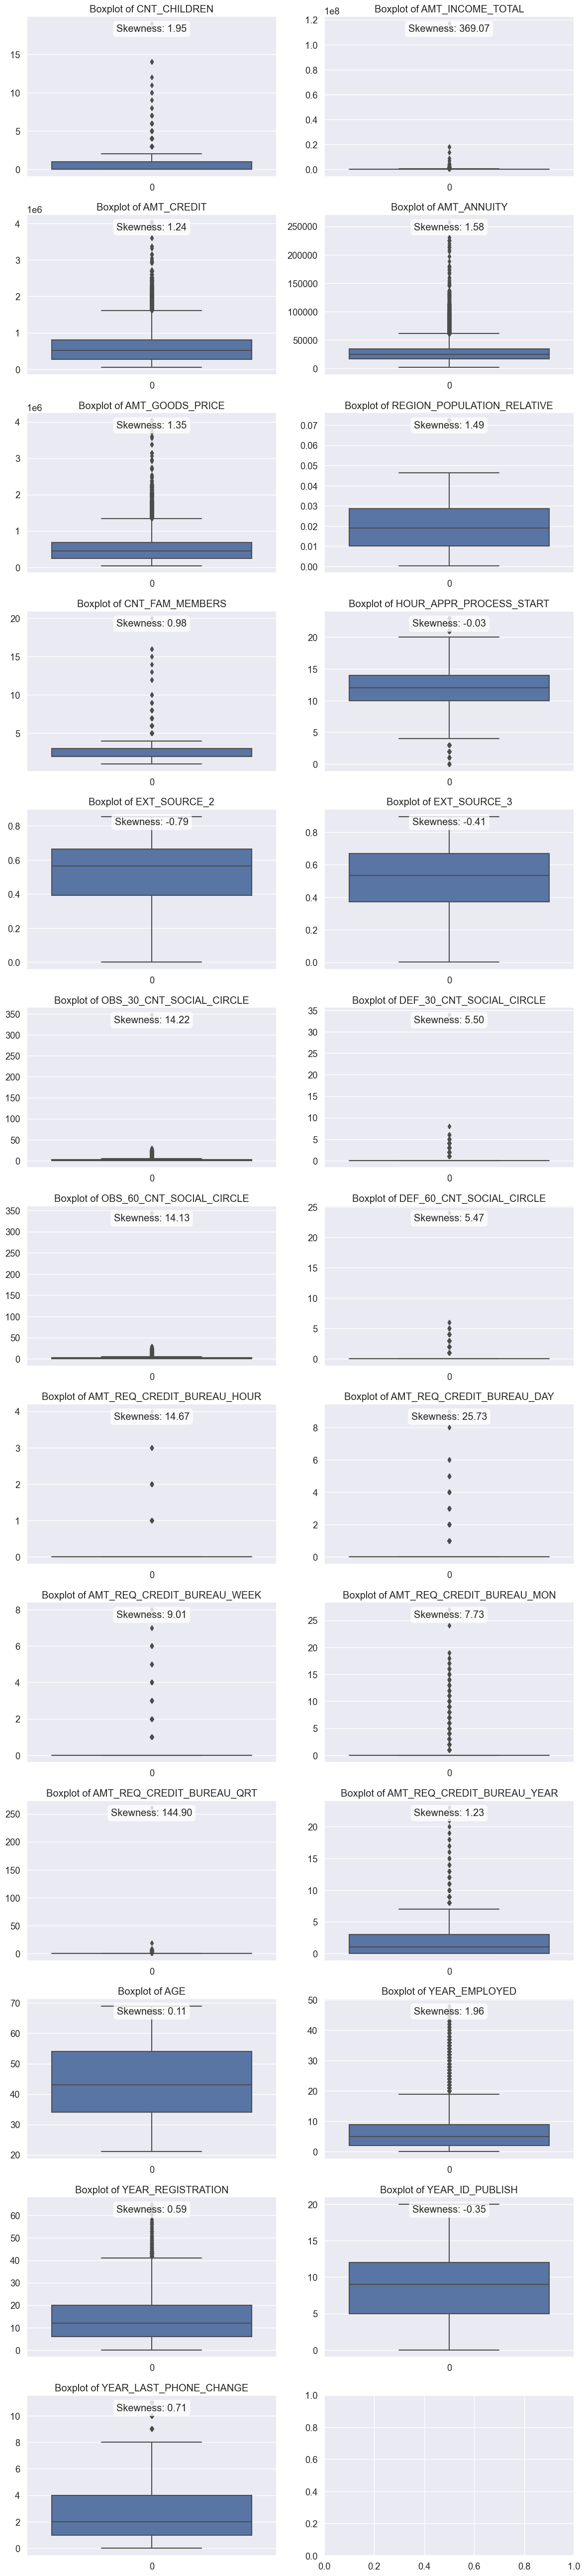

In [91]:
# Menampilkan boxplot
diagnostic_plots(X_train[num_columns])

Diketahui bahwa pada kolom `HOUR_APPR_PROCESS_START`, `EXIT_SOURCE_3`, `AGE`, `YEAR_ID_PUBLISH` merupakan normal distribution dan sisanya termasuk kedalam skewed distribution

### Handling Missing Values & Outliers

Splitting columns by normal distribution and skewed distribution

In [92]:
normal_dist_col = ['HOUR_APPR_PROCESS_START', 'EXT_SOURCE_3', 'AGE', 'YEAR_ID_PUBLISH']

skewed_dist_col = [col for col in num_columns if col not in normal_dist_col]

Splitting columns by encode columns or not encode

In [93]:
enc_col = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 
           'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'AGE_CATEGORY', 
           'WEEKDAY_APPR_PROCESS_START']

non_enc = [col for col in cat_columns if col not in enc_col]

Building Pipeline

In [94]:
num_normal = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                       ('outlier', Winsorizer(capping_method='gaussian', fold=3, tail='both')),
                       ('scaler', StandardScaler())])

In [95]:
num_skewed = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                       ('outlier', Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                                              variables=['x0','x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x17', 'x18', 'x19', 'x20'])),
                       ('scaler', MinMaxScaler())])

In [96]:
cat_ohe = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                    ('encode', OneHotEncoder(sparse = False, handle_unknown = 'ignore'))])

In [97]:
cat_ne = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))])

In [98]:
fe_pipeline = ColumnTransformer([('normal_handling', num_normal, normal_dist_col),
                                 ('skewed_handling', num_skewed, skewed_dist_col),
                                 ('cat_handling', cat_ohe, enc_col),
                                 ('non_handling', cat_ne, non_enc)])
fe_pipeline

ColumnTransformer(transformers=[('normal_handling',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('outlier',
                                                  Winsorizer(tail='both')),
                                                 ('scaler', StandardScaler())]),
                                 ['HOUR_APPR_PROCESS_START', 'EXT_SOURCE_3',
                                  'AGE', 'YEAR_ID_PUBLISH']),
                                ('skewed_handling',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('outlier',
                                                  Winsorizer(capping_method='iqr...
                                  'REG_CITY_NOT_WORK_CITY',
                                  'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
                                  'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
                                  'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
                                  'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
                                  'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
                                  'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
                                  'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
                                  'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
                                  'FLAG_DOCUMENT_17', ...])])

Handling Missing Values

Numerical Columns

In [99]:
# define simple imputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train_normal = imp_mean.fit_transform(X_train[normal_dist_col])
X_test_normal = imp_mean.transform(X_test[normal_dist_col])

In [100]:
# define simple imputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

X_train_skewed = imp_median.fit_transform(X_train[skewed_dist_col])
X_test_skewed = imp_median.transform(X_test[skewed_dist_col])

Categorical Columns

In [101]:
# define simple imputer
imp_modus = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

X_train_enc = imp_modus.fit_transform(X_train[enc_col])
X_test_enc = imp_modus.transform(X_test[enc_col])

In [102]:
# define simple imputer
imp_modus = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

X_train_ne = imp_modus.fit_transform(X_train[non_enc])
X_test_ne = imp_modus.transform(X_test[non_enc])

In [105]:
X_train_normal = pd.DataFrame(X_train_normal, columns=normal_dist_col)
X_test_normal = pd.DataFrame(X_test_normal, columns=normal_dist_col)

X_train_skewed = pd.DataFrame(X_train_skewed, columns=skewed_dist_col)
X_test_skewed = pd.DataFrame(X_test_skewed, columns= skewed_dist_col)

Create DataFrame for a copy dataframe

In [106]:
# convert into DataFrame
X_train_normal_copy = pd.DataFrame(X_train_normal, columns= normal_dist_col)
X_test_normal_copy = pd.DataFrame(X_test_normal, columns= normal_dist_col)

X_train_skewed_copy = pd.DataFrame(X_train_skewed, columns= skewed_dist_col)
X_test_skewed_copy = pd.DataFrame(X_test_skewed, columns = skewed_dist_col)

In [107]:
#convert into DataFrame
X_train_enc_copy = pd.DataFrame(X_train_enc, columns= enc_col)
X_test_enc_copy = pd.DataFrame(X_test_enc, columns = enc_col)

X_train_ne_copy = pd.DataFrame(X_train_ne, columns= non_enc)
X_test_ne_copy = pd.DataFrame(X_test_ne, columns= non_enc)

In [108]:
# reset index

X_train_normal_copy.reset_index(drop = True, inplace = True)
X_test_normal_copy.reset_index(drop = True, inplace = True)

X_train_skewed_copy.reset_index(drop = True, inplace = True)
X_test_skewed_copy.reset_index(drop = True, inplace = True)

X_train_enc_copy.reset_index(drop = True, inplace = True)
X_test_enc_copy.reset_index(drop = True, inplace = True)

X_train_ne_copy.reset_index(drop = True, inplace = True)
X_test_ne_copy.reset_index(drop = True, inplace = True)

y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [109]:
# define dataframe for concat
X_train_copy = pd.concat([X_train_normal_copy, X_train_skewed_copy, X_train_enc_copy, X_train_ne_copy], axis=1)
X_test_copy = pd.concat([X_test_normal_copy, X_test_skewed_copy, X_test_enc_copy, X_test_ne_copy], axis=1)

Handling Outliers

In [110]:
# define winsorizer
winsorizer_normal = Winsorizer(capping_method='gaussian', fold=3, tail='both')

X_train_normal = winsorizer_normal.fit_transform(X_train_normal)
X_test_normal = winsorizer_normal.transform(X_test_normal)

In [114]:
skewed_dist_col

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'YEAR_EMPLOYED',
 'YEAR_REGISTRATION',
 'YEAR_LAST_PHONE_CHANGE']

In [115]:
# define winsorizer
winsorizer_skewed = Winsorizer(capping_method='iqr', fold=1.5, tail='both', 
                               variables=['CNT_CHILDREN',
                                            'AMT_INCOME_TOTAL',
                                            'AMT_CREDIT',
                                            'AMT_ANNUITY',
                                            'AMT_GOODS_PRICE',
                                            'REGION_POPULATION_RELATIVE',
                                            'CNT_FAM_MEMBERS',
                                            'EXT_SOURCE_2',
                                            'OBS_30_CNT_SOCIAL_CIRCLE',
                                            'OBS_60_CNT_SOCIAL_CIRCLE',
                                            'AMT_REQ_CREDIT_BUREAU_YEAR',
                                            'YEAR_EMPLOYED',
                                            'YEAR_REGISTRATION',
                                            'YEAR_LAST_PHONE_CHANGE'])

X_train_skewed = winsorizer_skewed.fit_transform(X_train_skewed)
X_test_skewed = winsorizer_skewed.transform(X_test_skewed)

Feature Scaling

In [116]:
# define scaler
normal_scaler = StandardScaler()

X_train_normal = normal_scaler.fit_transform(X_train_normal)
X_test_normal = normal_scaler.transform(X_test_normal)

In [117]:
# define scaler
skewed_scaler = MinMaxScaler()

X_train_skewed = skewed_scaler.fit_transform(X_train_skewed)
X_test_skewed = skewed_scaler.transform(X_test_skewed)

Convert into dataframe

In [118]:
# convert into DataFrame
X_train_normal = pd.DataFrame(X_train_normal, columns= normal_dist_col)
X_test_normal = pd.DataFrame(X_test_normal, columns= normal_dist_col)

X_train_skewed = pd.DataFrame(X_train_skewed, columns= skewed_dist_col)
X_test_skewed = pd.DataFrame(X_test_skewed, columns = skewed_dist_col)

In [119]:
#convert into DataFrame
X_train_enc = pd.DataFrame(X_train_enc, columns= enc_col)
X_test_enc = pd.DataFrame(X_test_enc, columns = enc_col)

X_train_ne = pd.DataFrame(X_train_ne, columns= non_enc)
X_test_ne = pd.DataFrame(X_test_ne, columns= non_enc)

In [120]:
# reset index

X_train_normal.reset_index(drop = True, inplace = True)
X_test_normal.reset_index(drop = True, inplace = True)

X_train_skewed.reset_index(drop = True, inplace = True)
X_test_skewed.reset_index(drop = True, inplace = True)

X_train_enc.reset_index(drop = True, inplace = True)
X_test_enc.reset_index(drop = True, inplace = True)

X_train_ne.reset_index(drop = True, inplace = True)
X_test_ne.reset_index(drop = True, inplace = True)

y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

Concat All columns

In [121]:
# define dataframe for concat
X_train = pd.concat([X_train_normal, X_train_skewed, X_train_enc, X_train_ne], axis=1)
X_test = pd.concat([X_test_normal, X_test_skewed, X_test_enc, X_test_ne], axis=1)

Use SMOTENC to Balancing Data

In [122]:
# define SMOTENC
smotenc = SMOTENC([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 
                   54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71], random_state=7)

X_train_balance, y_train_balance = smotenc.fit_resample(X_train, y_train)
y_train_balance.value_counts()

0    226148
1    226148
Name: TARGET, dtype: int64

Feature Encoding

In [123]:
# Splitting into several column category
X_train_balance_normal = X_train_balance[normal_dist_col]
X_train_balance_skewed = X_train_balance[skewed_dist_col]

X_train_balance_enc = X_train_balance[enc_col]
X_train_balance_ne = X_train_balance[non_enc]


In [124]:
# define encoding

ohenc = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

X_train_balance_enc = ohenc.fit_transform(X_train_balance_enc)
X_test_enc = ohenc.transform(X_test_enc)

In [125]:
# define new features
feature_names = ohenc.get_feature_names_out(input_features= enc_col)

X_train_balance_enc = pd.DataFrame(X_train_balance_enc, columns=feature_names)
X_test_enc = pd.DataFrame(X_test_enc, columns=feature_names)

In [126]:
# reset index
X_train_balance_enc.reset_index(drop = True, inplace = True)
X_test_enc.reset_index(drop = True, inplace = True)

Concat All Columns

In [127]:
# define dataframe for concat
X_train_final = pd.concat([X_train_balance_normal, X_train_balance_skewed, X_train_balance_enc, X_train_balance_ne], axis=1)
X_test_final = pd.concat([X_test_normal, X_test_skewed, X_test_enc, X_test_ne], axis=1)

In [128]:
# convert dataframe to array
X_train_final_array = X_train_final.values
X_test_final_array = X_test_final.values

In [129]:
# convert to 1D array for y_train_balance
y_train_balance_flat = y_train_balance.ravel()

## **E. Model Definition**

In [130]:
cat_model = CatBoostClassifier(random_state=7)
rf_model = RandomForestClassifier(random_state=7)
xgb_model = XGBClassifier(objective="binary:logistic", random_state=7)

## **F. Model Evaluation**

### CatBoost

Learning rate set to 0.140217
0:	learn: 0.6449081	total: 200ms	remaining: 3m 19s
1:	learn: 0.5812492	total: 259ms	remaining: 2m 9s
2:	learn: 0.5546326	total: 317ms	remaining: 1m 45s
3:	learn: 0.5325500	total: 376ms	remaining: 1m 33s
4:	learn: 0.5062035	total: 445ms	remaining: 1m 28s
5:	learn: 0.4548448	total: 513ms	remaining: 1m 24s
6:	learn: 0.4432767	total: 581ms	remaining: 1m 22s
7:	learn: 0.4167106	total: 651ms	remaining: 1m 20s
8:	learn: 0.3662561	total: 743ms	remaining: 1m 21s
9:	learn: 0.3419162	total: 825ms	remaining: 1m 21s
10:	learn: 0.3136108	total: 892ms	remaining: 1m 20s
11:	learn: 0.2933968	total: 962ms	remaining: 1m 19s
12:	learn: 0.2810346	total: 1.02s	remaining: 1m 17s
13:	learn: 0.2727322	total: 1.09s	remaining: 1m 16s
14:	learn: 0.2685791	total: 1.16s	remaining: 1m 16s
15:	learn: 0.2579162	total: 1.23s	remaining: 1m 15s
16:	learn: 0.2454677	total: 1.3s	remaining: 1m 15s
17:	learn: 0.2402051	total: 1.36s	remaining: 1m 14s
18:	learn: 0.2366839	total: 1.43s	remaining: 1

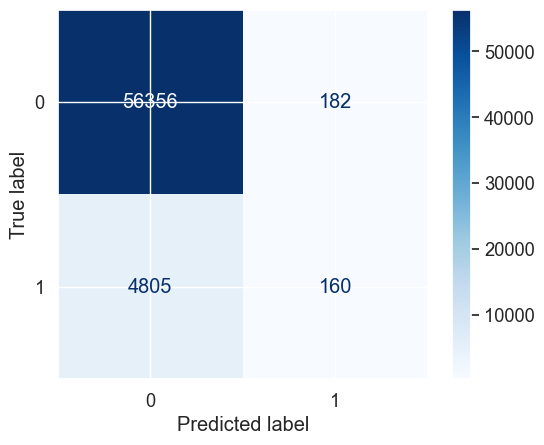

In [131]:
cat_model.fit(X_train_final_array, y_train_balance)
cat_train = cat_model.predict(X_train_final_array)
cat_tprob = cat_model.predict_proba(X_train_final_array)
# choose positive probability
cat_tprob_positive = cat_tprob[:, 1]
cat_test = cat_model.predict(X_test_final_array)
cat_prob = cat_model.predict_proba(X_test_final_array)
# choose positive probability
cat_prob_positive = cat_prob[:, 1]

print('Train Set')
print('ROC-AUC : ', roc_auc_score(y_train_balance_flat, cat_tprob_positive), '\n')
print(classification_report(y_train_balance, cat_train), '\n')
print('Test Set')
print('ROC-AUC : ', roc_auc_score(y_test, cat_prob_positive), '\n')
print(classification_report(y_test, cat_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(cat_model, X_test_final_array, y_test, cmap='Blues'))

### Random Forest

Train Set
ROC-AUC :  0.9999999999902234 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226148
           1       1.00      1.00      1.00    226148

    accuracy                           1.00    452296
   macro avg       1.00      1.00      1.00    452296
weighted avg       1.00      1.00      1.00    452296
 

Test Set
ROC-AUC :  0.6843199257086919 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56538
           1       0.20      0.09      0.13      4965

    accuracy                           0.90     61503
   macro avg       0.56      0.53      0.54     61503
weighted avg       0.87      0.90      0.88     61503

Confusion Matrix      : 


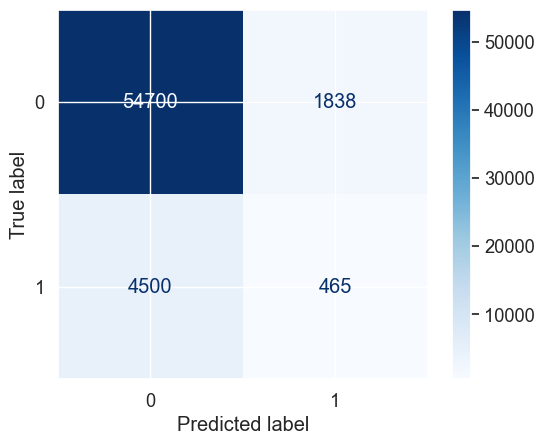

In [132]:
rf_model.fit(X_train_final_array, y_train_balance)
rf_train = rf_model.predict(X_train_final_array)
rf_tprob = rf_model.predict_proba(X_train_final_array)
# choose positive probability
rf_tprob_positive = rf_tprob[:, 1]
rf_test = rf_model.predict(X_test_final_array)
rf_prob = rf_model.predict_proba(X_test_final_array)
# choose positive probability
rf_prob_positive = rf_prob[:, 1]

print('Train Set')
print('ROC-AUC : ', roc_auc_score(y_train_balance_flat, rf_tprob_positive), '\n')
print(classification_report(y_train_balance, rf_train), '\n')
print('Test Set')
print('ROC-AUC : ', roc_auc_score(y_test, rf_prob_positive), '\n')
print(classification_report(y_test, rf_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_model, X_test_final_array, y_test, cmap='Blues'))

### XGBoost

Train Set
ROC-AUC :  0.9824758278422377 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    226148
           1       1.00      0.92      0.95    226148

    accuracy                           0.96    452296
   macro avg       0.96      0.96      0.96    452296
weighted avg       0.96      0.96      0.96    452296
 

Test Set
ROC-AUC :  0.7242877242825785 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.41      0.04      0.07      4965

    accuracy                           0.92     61503
   macro avg       0.67      0.52      0.51     61503
weighted avg       0.88      0.92      0.89     61503

Confusion Matrix      : 


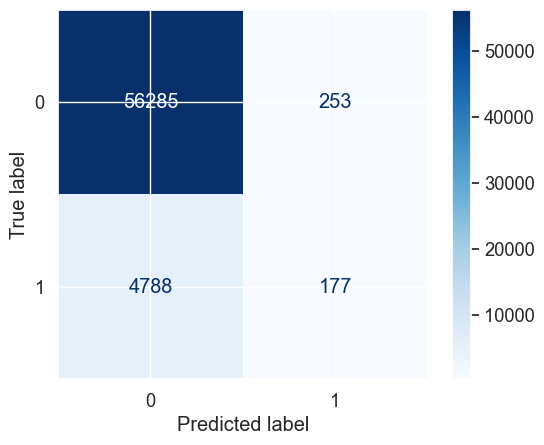

In [133]:
xgb_model.fit(X_train_final_array, y_train_balance)
xgb_train = xgb_model.predict(X_train_final_array)
xgb_tprob = xgb_model.predict_proba(X_train_final_array)
# choose positive probability
xgb_tprob_positive = xgb_tprob[:, 1]
xgb_test = xgb_model.predict(X_test_final_array)
xgb_prob = xgb_model.predict_proba(X_test_final_array)
# choose positive probability
xgb_prob_positive = xgb_prob[:, 1]

print('Train Set')
print('ROC-AUC : ', roc_auc_score(y_train_balance_flat, xgb_tprob_positive), '\n')
print(classification_report(y_train_balance, xgb_train), '\n')
print('Test Set')
print('ROC-AUC : ', roc_auc_score(y_test, xgb_prob_positive), '\n')
print(classification_report(y_test, xgb_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb_model, X_test_final_array, y_test, cmap='Blues'))

### Feature Importance CatBoost Model

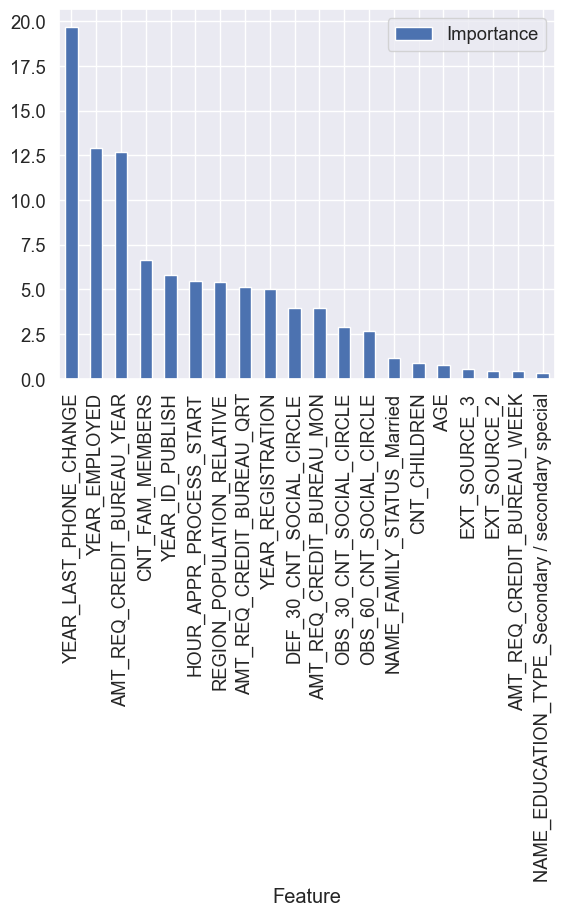

In [134]:
# Menghitung feature importance
feature_importance = cat_model.feature_importances_

sorted_indices = np.argsort(feature_importance)[::-1]

# Membuat dataframe
df_feature_importance = pd.DataFrame(columns=['Feature', 'Importance'])

# Menambahkan data ke dataframe
for i in sorted_indices:
    feature_name = X_train_final.columns[i]
    importance = feature_importance[i]
    df_feature_importance = df_feature_importance.append({'Feature': feature_name, 'Importance': importance}, ignore_index=True)

# Mengambil 20 feature teratas
top_20_features = df_feature_importance.head(20)

# Plot bar dengan sumbu X sebagai 'Feature'
top_20_features.plot(x='Feature', y='Importance', kind='bar')

# Menampilkan plot
plt.show()

**Model Analysis :**

Dari ketiga model yang telah digunakan, model CatBoost merupakan model terbaik karena memiliki nilai ROC-AUC sekitar 74% dibandingkan kedua model lainnya

Model masih *Under Fitting* karena imbalance nya data pada kolom `TARGET`

Feature Importance yang memberikan kontribusi paling tinggi yaitu `YEAR_LAST_PHONE_CHANGE`, `YEAR_EMPLOYED`, dan `AMT_REQ_CREDIT_BUREAU_YEAR`

Compare Actual Target to Predict Target

In [135]:
X_test_copy['Predict'] = cat_test

X_test_copy

HOUR_APPR_PROCESS_START  EXT_SOURCE_3   AGE  YEAR_ID_PUBLISH  \
0                         13.0      0.510955  29.0              0.0   
1                         10.0      0.622922  24.0              4.0   
2                         16.0      0.232725  32.0              2.0   
3                          9.0      0.558507  41.0             14.0   
4                         11.0      0.670652  41.0             14.0   
...                        ...           ...   ...              ...   
61498                      5.0      0.297087  25.0              5.0   
61499                     15.0      0.510955  59.0              7.0   
61500                      8.0      0.510955  42.0              7.0   
61501                     15.0      0.372334  31.0              7.0   
61502                     12.0      0.212756  31.0              4.0   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               0.0           99000.0    269550.0      14620.5   
1               0.0          135000.0    314100.0      12420.0   
2               0.0          157500.0    485086.5      23724.0   
3               2.0          270000.0   1024740.0      49428.0   
4               0.0           85500.0    557424.0      14832.0   
...             ...               ...         ...          ...   
61498           0.0          139500.0   1078200.0      31653.0   
61499           1.0          180000.0    900000.0      26446.5   
61500           1.0           67500.0    337500.0      12852.0   
61501           1.0          135000.0    521280.0      27423.0   
61502           0.0          202500.0    521280.0      31500.0   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  \
0             225000.0                    0.007330              2.0   
1             225000.0                    0.072508              1.0   
2             400500.0                    0.006207              2.0   
3             900000.0                    0.019101              4.0   
4             441000.0                    0.010276              1.0   
...                ...                         ...              ...   
61498         900000.0                    0.010032              2.0   
61499         900000.0                    0.019689              3.0   
61500         337500.0                    0.010966              3.0   
61501         450000.0                    0.007120              3.0   
61502         450000.0                    0.018209              1.0   

       EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0          0.655674                       0.0                       0.0   
1          0.713095                       2.0                       0.0   
2          0.662180                       5.0                       0.0   
3          0.651227                       0.0                       0.0   
4          0.463809                       0.0                       0.0   
...             ...                       ...                       ...   
61498      0.610904                       0.0                       0.0   
61499      0.618956                       0.0                       0.0   
61500      0.224646                       0.0                       0.0   
61501      0.352002                       9.0                       0.0   
61502      0.531548                       0.0                       0.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                           0.0                       0.0   
1                           2.0                       0.0   
2                           5.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   
...                         ...                       ...   
61498                       0.0                       0.0   
61499                       0.0                       0.0   
61500                       0.0                       0.0 

In [136]:
# concat with target

X_test_copy = pd.concat([X_test_copy, y_test], axis=1)
X_test_copy

HOUR_APPR_PROCESS_START  EXT_SOURCE_3   AGE  YEAR_ID_PUBLISH  \
0                         13.0      0.510955  29.0              0.0   
1                         10.0      0.622922  24.0              4.0   
2                         16.0      0.232725  32.0              2.0   
3                          9.0      0.558507  41.0             14.0   
4                         11.0      0.670652  41.0             14.0   
...                        ...           ...   ...              ...   
61498                      5.0      0.297087  25.0              5.0   
61499                     15.0      0.510955  59.0              7.0   
61500                      8.0      0.510955  42.0              7.0   
61501                     15.0      0.372334  31.0              7.0   
61502                     12.0      0.212756  31.0              4.0   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               0.0           99000.0    269550.0      14620.5   
1               0.0          135000.0    314100.0      12420.0   
2               0.0          157500.0    485086.5      23724.0   
3               2.0          270000.0   1024740.0      49428.0   
4               0.0           85500.0    557424.0      14832.0   
...             ...               ...         ...          ...   
61498           0.0          139500.0   1078200.0      31653.0   
61499           1.0          180000.0    900000.0      26446.5   
61500           1.0           67500.0    337500.0      12852.0   
61501           1.0          135000.0    521280.0      27423.0   
61502           0.0          202500.0    521280.0      31500.0   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  \
0             225000.0                    0.007330              2.0   
1             225000.0                    0.072508              1.0   
2             400500.0                    0.006207              2.0   
3             900000.0                    0.019101              4.0   
4             441000.0                    0.010276              1.0   
...                ...                         ...              ...   
61498         900000.0                    0.010032              2.0   
61499         900000.0                    0.019689              3.0   
61500         337500.0                    0.010966              3.0   
61501         450000.0                    0.007120              3.0   
61502         450000.0                    0.018209              1.0   

       EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0          0.655674                       0.0                       0.0   
1          0.713095                       2.0                       0.0   
2          0.662180                       5.0                       0.0   
3          0.651227                       0.0                       0.0   
4          0.463809                       0.0                       0.0   
...             ...                       ...                       ...   
61498      0.610904                       0.0                       0.0   
61499      0.618956                       0.0                       0.0   
61500      0.224646                       0.0                       0.0   
61501      0.352002                       9.0                       0.0   
61502      0.531548                       0.0                       0.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                           0.0                       0.0   
1                           2.0                       0.0   
2                           5.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   
...                         ...                       ...   
61498                       0.0                       0.0   
61499                       0.0                       0.0   
61500                       0.0                       0.0 

In [137]:
X_test_recall = X_test_copy[(X_test_copy['TARGET'] == 1) & (X_test_copy['Predict'] == 0)]
X_test_recall

HOUR_APPR_PROCESS_START  EXT_SOURCE_3   AGE  YEAR_ID_PUBLISH  \
26                        17.0      0.303146  52.0              6.0   
57                        12.0      0.786267  42.0             11.0   
63                        12.0      0.761026  55.0              9.0   
102                       11.0      0.082269  35.0              9.0   
116                       10.0      0.280790  38.0              7.0   
...                        ...           ...   ...              ...   
61474                      9.0      0.474051  54.0              9.0   
61481                      4.0      0.510955  27.0              7.0   
61491                     12.0      0.492060  57.0             12.0   
61497                     14.0      0.452534  45.0              0.0   
61501                     15.0      0.372334  31.0              7.0   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
26              0.0          360000.0   1223010.0      51948.0   
57              2.0          112500.0    450000.0      30204.0   
63              1.0          135000.0    781920.0      28084.5   
102             2.0          126000.0    545040.0      26640.0   
116             1.0          157500.0    348264.0      23404.5   
...             ...               ...         ...          ...   
61474           0.0          135000.0    675000.0      26154.0   
61481           0.0          135000.0    288994.5      31122.0   
61491           0.0          103500.0    808650.0      26217.0   
61497           0.0           67500.0    147726.0      11799.0   
61501           1.0          135000.0    521280.0      27423.0   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  \
26           1125000.0                    0.011657              1.0   
57            450000.0                    0.026392              4.0   
63            675000.0                    0.010556              3.0   
102           450000.0                    0.008625              4.0   
116           315000.0                    0.019689              3.0   
...                ...                         ...              ...   
61474         675000.0                    0.020246              1.0   
61481         274500.0                    0.006852              2.0   
61491         675000.0                    0.031329              1.0   
61497         130500.0                    0.010556              2.0   
61501         450000.0                    0.007120              3.0   

       EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
26         0.498930                       3.0                       0.0   
57         0.245350                       3.0                       0.0   
63         0.057825                       5.0                       0.0   
102        0.609031                       0.0                       0.0   
116        0.035100                       1.0                       1.0   
...             ...                       ...                       ...   
61474      0.306083                       0.0                       0.0   
61481      0.249679                       0.0                       0.0   
61491      0.159679                       6.0                       1.0   
61497      0.223202                       1.0                       1.0   
61501      0.352002                       9.0                       0.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
26                          3.0                       0.0   
57                          3.0                       0.0   
63                          5.0                       0.0   
102                         0.0                       0.0   
116                         1.0                       1.0   
...                         ...                       ...   
61474                       0.0                       0.0   
61481                       0.0                       0.0   
61491                       6.0                       1.0 

## **G. Model Saving**

In [138]:
# Save File

# Modelling
with open('cat_model.pkl', 'wb') as file_1:
    pickle.dump(cat_model, file_1)

# Pre-processing
with open('fe_pipeline.pkl', 'wb') as file_11:
    pickle.dump(fe_pipeline, file_11)

with open('ohenc.pkl', 'wb') as file_2:
    pickle.dump(ohenc, file_2)
    
with open('normal_scaler.pkl', 'wb') as file_3:
    pickle.dump(normal_scaler, file_3)

with open('skewed_scaler.pkl', 'wb') as file_4:
    pickle.dump(skewed_scaler, file_4)

with open('winsorizer_normal.pkl', 'wb') as file_5:
    pickle.dump(winsorizer_normal, file_5)

with open('winsorizer_skewed.pkl', 'wb') as file_6:
    pickle.dump(winsorizer_skewed, file_6)
    
# List Numeric & Category
with open('normal_dist_col.txt', 'w') as file_7:
    json.dump(normal_dist_col, file_7)

with open('skewed_dist_col.txt', 'w') as file_8:
    json.dump(skewed_dist_col, file_8)
    
with open('enc_col.txt', 'w') as file_9:
    json.dump(enc_col, file_9)
    
with open('non_enc.txt', 'w') as file_10:
    json.dump(non_enc, file_10)

## **H. Model Inference**

In [139]:
# Load Model

# Modelling
with open('cat_model.pkl', 'rb') as file_1:
    cat_model = pickle.load(file_1)

# Pre-processing
with open('fe_pipeline.pkl', 'rb') as file_11:
    fe_pipeline = pickle.load(file_11)
    
with open('ohenc.pkl', 'rb') as file_2:
    ohenc = pickle.load(file_2)
    
with open('normal_scaler.pkl', 'rb') as file_3:
    normal_scaler = pickle.load(file_3)

with open('skewed_scaler.pkl', 'rb') as file_4:
    skewed_scaler = pickle.load(file_4)

with open('winsorizer_normal.pkl', 'rb') as file_5:
    winsorizer_normal = pickle.load(file_5)

with open('winsorizer_skewed.pkl', 'rb') as file_6:
    winsorizer_skewed = pickle.load(file_6)
    
# List Numeric & Category
with open('normal_dist_col.txt', 'r') as file_7:
    normal_dist_col = json.load(file_7)

with open('skewed_dist_col.txt', 'r') as file_8:
    skewed_dist_col = json.load(file_8)
    
with open('enc_col.txt', 'r') as file_9:
    enc_col = json.load(file_9)
    
with open('non_enc.txt', 'r') as file_10:
    non_enc = json.load(file_10)

Data Loading

In [140]:
# define dataframe
app_test = pd.read_csv('application_test.csv')
pd.set_option('display.max_columns', None)

Data Cleaning

In [141]:
# define age columns
app_test['AGE'] = app_test['DAYS_BIRTH'] / -365
app_test['AGE'] = app_test['AGE'].apply(round)

In [142]:
# grouping age of customer
age_cat = []
for i in app_test['AGE']:
    if i < 36:
        age_cat.append('Young Adult')
    elif i < 51:
        age_cat.append('Adult')
    else:
        age_cat.append('Older')

app_test['AGE_CATEGORY'] = age_cat

In [143]:
# define year employed
app_test['YEAR_EMPLOYED'] = app_test['DAYS_EMPLOYED'] / -365
app_test['YEAR_EMPLOYED'] = app_test['YEAR_EMPLOYED'].apply(round)

In [144]:
# define year registration
app_test['YEAR_REGISTRATION'] = app_test['DAYS_REGISTRATION'] / -365
app_test['YEAR_REGISTRATION'] = app_test['YEAR_REGISTRATION'].apply(round)

In [145]:
# define year id publish
app_test['YEAR_ID_PUBLISH'] = app_test['DAYS_ID_PUBLISH'] / -365
app_test['YEAR_ID_PUBLISH'] = app_test['YEAR_ID_PUBLISH'].apply(round)

In [146]:
# fillna the null value
median_last_phone_change = app_test['DAYS_LAST_PHONE_CHANGE'].median()
app_test['DAYS_LAST_PHONE_CHANGE'].fillna(median_last_phone_change, inplace=True)

In [147]:
# define year last phone change
app_test['YEAR_LAST_PHONE_CHANGE'] = app_test['DAYS_LAST_PHONE_CHANGE'] / -365
app_test['YEAR_LAST_PHONE_CHANGE'] = app_test['YEAR_LAST_PHONE_CHANGE'].apply(round)

In [148]:
# missing value statistic
missing_values = missing_value(app_test)
missing_values.head(50)

Missing Values  % of Missing Values
COMMONAREA_MODE                        33495                 68.7
COMMONAREA_MEDI                        33495                 68.7
COMMONAREA_AVG                         33495                 68.7
NONLIVINGAPARTMENTS_MEDI               33347                 68.4
NONLIVINGAPARTMENTS_AVG                33347                 68.4
NONLIVINGAPARTMENTS_MODE               33347                 68.4
FONDKAPREMONT_MODE                     32797                 67.3
LIVINGAPARTMENTS_MODE                  32780                 67.2
LIVINGAPARTMENTS_MEDI                  32780                 67.2
LIVINGAPARTMENTS_AVG                   32780                 67.2
FLOORSMIN_MEDI                         32466                 66.6
FLOORSMIN_MODE                         32466                 66.6
FLOORSMIN_AVG                          32466                 66.6
OWN_CAR_AGE                            32312                 66.3
YEARS_BUILD_AVG                        31818                 65.3
YEARS_BUILD_MEDI                       31818                 65.3
YEARS_BUILD_MODE                       31818                 65.3
LANDAREA_MODE                          28254                 58.0
LANDAREA_AVG                           28254                 58.0
LANDAREA_MEDI                          28254                 58.0
BASEMENTAREA_MEDI                      27641                 56.7
BASEMENTAREA_AVG                       27641                 56.7
BASEMENTAREA_MODE                      27641                 56.7
NONLIVINGAREA_MEDI                     26084                 53.5
NONLIVINGAREA_MODE                     26084                 53.5
NONLIVINGAREA_AVG                      26084                 53.5
ELEVATORS_MEDI                         25189                 51.7
ELEVATORS_MODE                         25189                 51.7
ELEVATORS_AVG                          25189                 51.7
WALLSMATERIAL_MODE                     23893                 49.0
APARTMENTS_MODE                        23887                 49.0
APARTMENTS_MEDI                        23887                 49.0
APARTMENTS_AVG                         23887                 49.0
HOUSETYPE_MODE                         23619                 48.5
ENTRANCES_MODE                         23579                 48.4
ENTRANCES_MEDI                         23579                 48.4
ENTRANCES_AVG                          23579                 48.4
LIVINGAREA_AVG                         23552                 48.3
LIVINGAREA_MEDI                        23552                 48.3
LIVINGAREA_MODE                        23552                 48.3
FLOORSMAX_MEDI                         23321                 47.8
FLOORSMAX_MODE                         23321                 47.8
FLOORSMAX_AVG                          23321                 47.8
YEARS_BEGINEXPLUATATION_MEDI           22856                 46.9
YEARS_BEGINEXPLUATATION_MODE           22856                 46.9
YEARS_BEGINEXPLUATATION_AVG            22856                 46.9
TOTALAREA_MODE                         22624                 46.4
EMERGENCYSTATE_MODE                    22209                 45.6
EXT_SOURCE_1                           20532                 42.1
OCCUPATION_TYPE                        15605                 32.0

In [149]:
# drop unnecessary column
z = app_test.drop(['SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'], axis=1)
z = z.drop(filtered_columns, axis=1)
z

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0             Cash loans           F            N               Y   
1             Cash loans           M            N               Y   
2             Cash loans           M            Y               Y   
3             Cash loans           F            N               Y   
4             Cash loans           M            Y               N   
...                  ...         ...          ...             ...   
48739         Cash loans           F            N               Y   
48740         Cash loans           F            N               N   
48741         Cash loans           F            Y               Y   
48742         Cash loans           M            N               N   
48743         Cash loans           F            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 0          135000.0    568800.0      20560.5   
1                 0           99000.0    222768.0      17370.0   
2                 0          202500.0    663264.0      69777.0   
3                 2          315000.0   1575000.0      49018.5   
4                 1          180000.0    625500.0      32067.0   
...             ...               ...         ...          ...   
48739             0          121500.0    412560.0      17473.5   
48740             2          157500.0    622413.0      31909.5   
48741             1          202500.0    315000.0      33205.5   
48742             0          225000.0    450000.0      25128.0   
48743             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0             450000.0   Unaccompanied               Working   
1             180000.0   Unaccompanied               Working   
2             630000.0             NaN               Working   
3            1575000.0   Unaccompanied               Working   
4             625500.0   Unaccompanied               Working   
...                ...             ...                   ...   
48739         270000.0   Unaccompanied               Working   
48740         495000.0   Unaccompanied  Commercial associate   
48741         315000.0   Unaccompanied  Commercial associate   
48742         450000.0          Family  Commercial associate   
48743         270000.0   Unaccompanied               Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                   Higher education            Married  House / apartment   
1      Secondary / secondary special            Married  House / apartment   
2                   Higher education            Married  House / apartment   
3      Secondary / secondary special            Married  House / apartment   
4      Secondary / secondary special            Married  House / apartment   
...                              ...                ...                ...   
48739  Secondary / secondary special              Widow  House / apartment   
48740  Secondary / secondary special            Married  House / apartment   
48741  Secondary / secondary special            Married  House / apartment   
48742               Higher education            Married  House / apartment   
48743  Secondary / secondary special            Married  House / apartment   

       REGION_POPULATION_RELATIVE  FLAG_MOBIL  FLAG_EMP_PHONE  \
0                        0.018850           1               1   
1                        0.035792           1               1   
2                        0.019101           1               1   
3                        0.026392           1               1   
4                        0.010032           1               1   
...                           ...         ...             ...   
48739                    0.002042           1               1   
48740                    0.035792           1               1   
48741                    0.026392           1               1   
48742                    0.0

### Feature Engineering Using Pipeline

In [150]:
X_train_pipe = fe_pipeline.fit_transform(X_train)
df_inf_final = fe_pipeline.transform(z)

In [151]:
df_inf_final

array([[3.00006597, 0.15951954, 3.        , ..., 0.        , 0.        ,
        0.        ],
       [3.00006597, 0.43296167, 3.        , ..., 0.        , 0.        ,
        0.        ],
       [3.00006597, 0.61099133, 3.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [3.00006597, 0.28371188, 3.        , ..., 0.        , 0.        ,
        0.        ],
       [3.00006597, 0.5954562 , 3.        , ..., 0.        , 0.        ,
        0.        ],
       [3.00006597, 0.27213368, 3.        , ..., 0.        , 0.        ,
        0.        ]])

Predict TARGET

In [152]:
y_pred_inf = cat_model.predict(df_inf_final)
y_pred_inf

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [153]:
z['Predict'] = y_pred_inf

In [154]:
z.Predict.value_counts()

0    48401
1      343
Name: Predict, dtype: int64

# **V. Conclusion**

## **Exploratory Data Analysis :**


Berdasarkan analisis terhadap berbagai faktor yang mempengaruhi perilaku pelanggan dalam membayar pinjaman, beberapa kesimpulan dapat diambil. Pertama, pelanggan dengan pendapatan total yang rendah, jumlah kredit yang kecil, harga barang yang terbatas, dan anuitas pinjaman yang rendah cenderung mengalami kesulitan dalam membayar pinjaman. Keluarga dengan jumlah anggota yang sedikit, usia pelanggan muda, dan status baru mendapatkan pekerjaan juga dapat menghadapi kesulitan dalam pembayaran.

Selanjutnya, jenis kontrak pinjaman (cash loans), kepemilikan real estate tanpa keinginan memiliki mobil, dan status perkawinan juga berpotensi menjadi faktor yang sulit membayar pinjaman. Tipe penghuni yang tidak didampingi (unaccompanied) dan pendidikan menengah khusus (secondary special) juga dapat mempengaruhi perilaku pelanggan dalam membayar pinjaman.

Selain itu, sumber pendapatan dari pekerjaan (working), asosiasi komersial (commercial associate), dan pensiunan (pensioner) serta kepemilikan aset rumah atau apartemen dapat berhubungan dengan kesulitan pembayaran pinjaman. Tidak memiliki telepon kerja, tetapi memiliki telepon seluler dan rumah yang mudah dihubungi melalui telepon tanpa email juga dapat menjadi indikasi kesulitan dalam pembayaran pinjaman.

Faktor lain yang dapat mempengaruhi perilaku pelanggan adalah rating wilayah tinggal, alamat permanen dan alamat kontak yang sama, tipe hunian blok apartemen, dan bahan bangunan rumah. Pelanggan yang tidak menyediakan seluruh dokumen yang diperlukan juga dapat menghadapi kesulitan dalam membayar pinjaman.

Terakhir, jenis pekerjaan seperti buruh, staf inti, pengemudi, manajer, dan staf penjualan, serta jenis organisasi atau perusahaan tertentu (business entity type 3, XNA, dan self-employed) dapat berhubungan dengan kesulitan dalam pembayaran pinjaman.

Kesimpulannya, ada banyak faktor yang dapat mempengaruhi perilaku pelanggan dalam membayar pinjaman. Faktor-faktor seperti pendapatan rendah, jumlah kredit, harga barang, anuitas pinjaman, keluarga, status pekerjaan, kepemilikan aset, jenis kontrak pinjaman, tipe penghuni, pendidikan, status perkawinan, jenis rumah, dokumen yang disediakan, jenis pekerjaan, dan jenis organisasi/perusahaan semua dapat berkontribusi terhadap kesulitan pelanggan dalam membayar pinjaman.

## **Model Analysis :**

Dari ketiga model yang telah digunakan, model CatBoost merupakan model terbaik karena memiliki nilai ROC-AUC sekitar 74% dibandingkan kedua model lainnya

Model masih *Under Fitting* karena imbalance nya data pada kolom `TARGET`

Feature Importance yang memberikan kontribusi paling tinggi yaitu `YEAR_LAST_PHONE_CHANGE`, `YEAR_EMPLOYED`, dan `AMT_REQ_CREDIT_BUREAU_YEAR`

## **Insight / Reccomendation :**

Untuk Data dikarenakan inbalance perlunya untuk memiliki dataset yang balance pada TARGET (binary classification) hal ini memberikan dampak pada model untuk memprediksi customer

Untuk meningkatkan nilai metric, dapat dilakukan feature selection, selain itu dapat melakukan pengembangan model lebih lanjut

Untuk **HOME CREDIT INDONESIA** saat customer mencoba melakukan registrasi, dapat dilakukan assessment terlebih dahulu apakah customer tersebut layak mendapatkan pinjaman atau tidak, untuk mengurangi kerugian dan meng-antisipaasi customer yang nantinya sulit untuk membayar tagihan pinjaman